In [9]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot figures
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Exploration: 

## <font color='red'> to be updated:

<font color='red'>The borehole logs and laboratory testing from 44 sites were analysed and interpreted values for the following geotechnical parameters were obtained:

* Natural moisture content (wn),
* Initial Void Ratio (e0),
* Atterberg Limits determinations,
    * Liquid Limit (wL)
    * Plastic Limit (wP)
    * Plasticity Index (Ip)
* Overconsolidated Ratio (OCR),
* Preconsolidation Constrained Modulus (Mi),
* Post-consolidation Constrained Modulus (MP),
* Compression Index (Cc), and
* Recompression Index (Cr).

Over 111 oedometer tests and 94 Atterberg Limits determination tests results were collected for analyses.</font>

#### 1.1 Loading Data

In [10]:
## Reading data
pd.options.display.max_columns = None
Geo_DB_original = pd.read_excel("GEO_DB_PS-20200113.xlsx",sheet_name="Cons for ANN",skiprows=1)
#Geo_DB_original.head()

In [11]:
Geo_DB_original.shape

(91, 29)

#### 1.2 Cleaning Data

In [12]:
#Changing columns names for inputs and outputs
Geo_DB_rename = Geo_DB_original.rename(columns={'Top Depth (m)':'Top_Depth','Easting (m)':'Easting','Northing (m)':'Northing',
                                       'Soil Class':'Class','e0':'e0','gd0 (kN/m3)':'gd0','Gs':'Gs',
                                       'w0 (%)':'w0','Organic Content (%)':'OC','CV \n(m2/year)':'CV'})

In [13]:
# Assigning features and targets (inputs, outputs)
features=['Top_Depth','Easting','Northing','Class','e0','gd0','Gs','w0','OC']
targets=['Cce','Cre','Cae','OCR','CV']

In [14]:
Geo_DB=Geo_DB_rename[features+targets]

In [15]:
Geo_DB.shape

(91, 14)

In [16]:
#Clean Data

# Remove rows where the soil class is 'other' ( three rows)
Geo_DB=Geo_DB[Geo_DB['Class']!='other'] 

# Remove the word "Class"
Geo_DB.loc[:]['Class']=Geo_DB['Class'].str.lstrip('Class ')

# Remove rows with Gs= 8.41 and Gs=0.27 which looks like an outlier (two rows)
Geo_DB=Geo_DB[Geo_DB['Gs']<8]
Geo_DB=Geo_DB[Geo_DB['Gs']>0.5]

# Remove the row with OCR= 38.37 (one row)
Geo_DB=Geo_DB[Geo_DB['OCR']<38]

# Remove rows with Organic Content not available (four rows)
Geo_DB.dropna(inplace=True)

In [17]:
#Change the Class type from Object to integer
Geo_DB['Class']=Geo_DB['Class'].astype(int)

In [18]:
Geo_DB.Class.dtype

dtype('int32')

In [19]:
Geo_DB.shape

(81, 14)

In [20]:
Geo_DB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 88
Data columns (total 14 columns):
Top_Depth    81 non-null float64
Easting      81 non-null float64
Northing     81 non-null float64
Class        81 non-null int32
e0           81 non-null float64
gd0          81 non-null float64
Gs           81 non-null float64
w0           81 non-null float64
OC           81 non-null float64
Cce          81 non-null float64
Cre          81 non-null float64
Cae          81 non-null float64
OCR          81 non-null float64
CV           81 non-null float64
dtypes: float64(13), int32(1)
memory usage: 9.2 KB


In [21]:
Geo_DB.describe()

,Top_Depth,Easting,Northing,Class,e0,gd0,Gs,w0,OC,Cce,Cre,Cae,OCR,CV
count,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,6.160617,317010.632753,4.833907e+06,4.358025,3.263332,8.149259,2.463945,1.213871,24.488889,0.220171,0.042087,0.014877,2.579976,9.696221
std,3.108251,307.291113,2.601418e+02,0.598094,2.828720,4.414781,0.301613,1.008709,15.512471,0.118825,0.034353,0.011721,3.534404,6.454127
min,3.000000,316262.413000,4.833436e+06,3.000000,0.646064,1.680000,1.300053,0.194988,6.300000,0.037607,0.001453,0.000041,0.000000,0.000000
25%,4.000000,316852.080000,4.833709e+06,4.000000,1.160449,4.420000,2.396858,0.420700,13.800000,0.134448,0.012085,0.004715,1.000000,4.472518
50%,5.200000,317059.720000,4.833910e+06,4.000000,2.293667,7.710000,2.556767,0.789813,19.000000,0.224097,0.034747,0.012484,1.050000,8.469383
75%,6.900000,317231.388000,4.834093e+06,5.000000,4.229384,12.370000,2.647911,1.612000,28.300000,0.285906,0.063025,0.024085,2.150000,14.241609
max,20.400000,317478.900000,4.834532e+06,5.000000,14.480575,16.550000,3.049280,4.172039,74.300000,0.858000,0.132033,0.049446,18.812399,28.601241


#### 1.3 Ploting Data

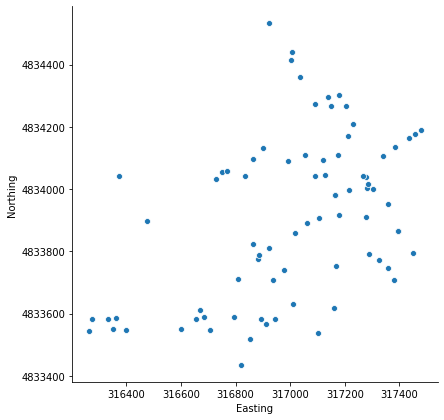

In [22]:
#Plot samples locations using easting and northing
p=sns.pairplot(Geo_DB,height=6, x_vars=['Easting'],y_vars=['Northing'])

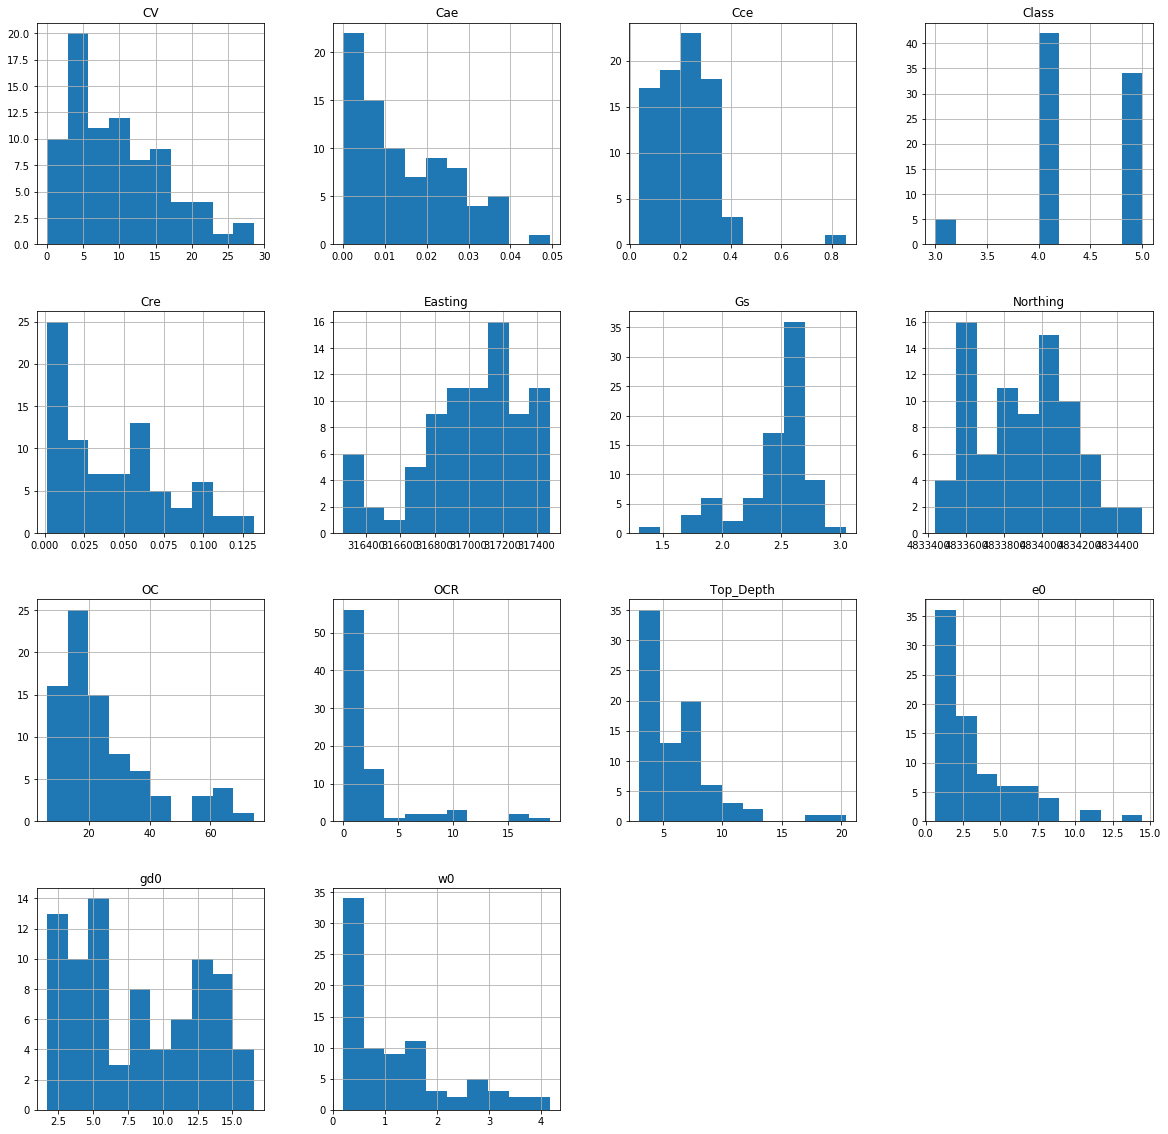

In [23]:
hist=Geo_DB.hist(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

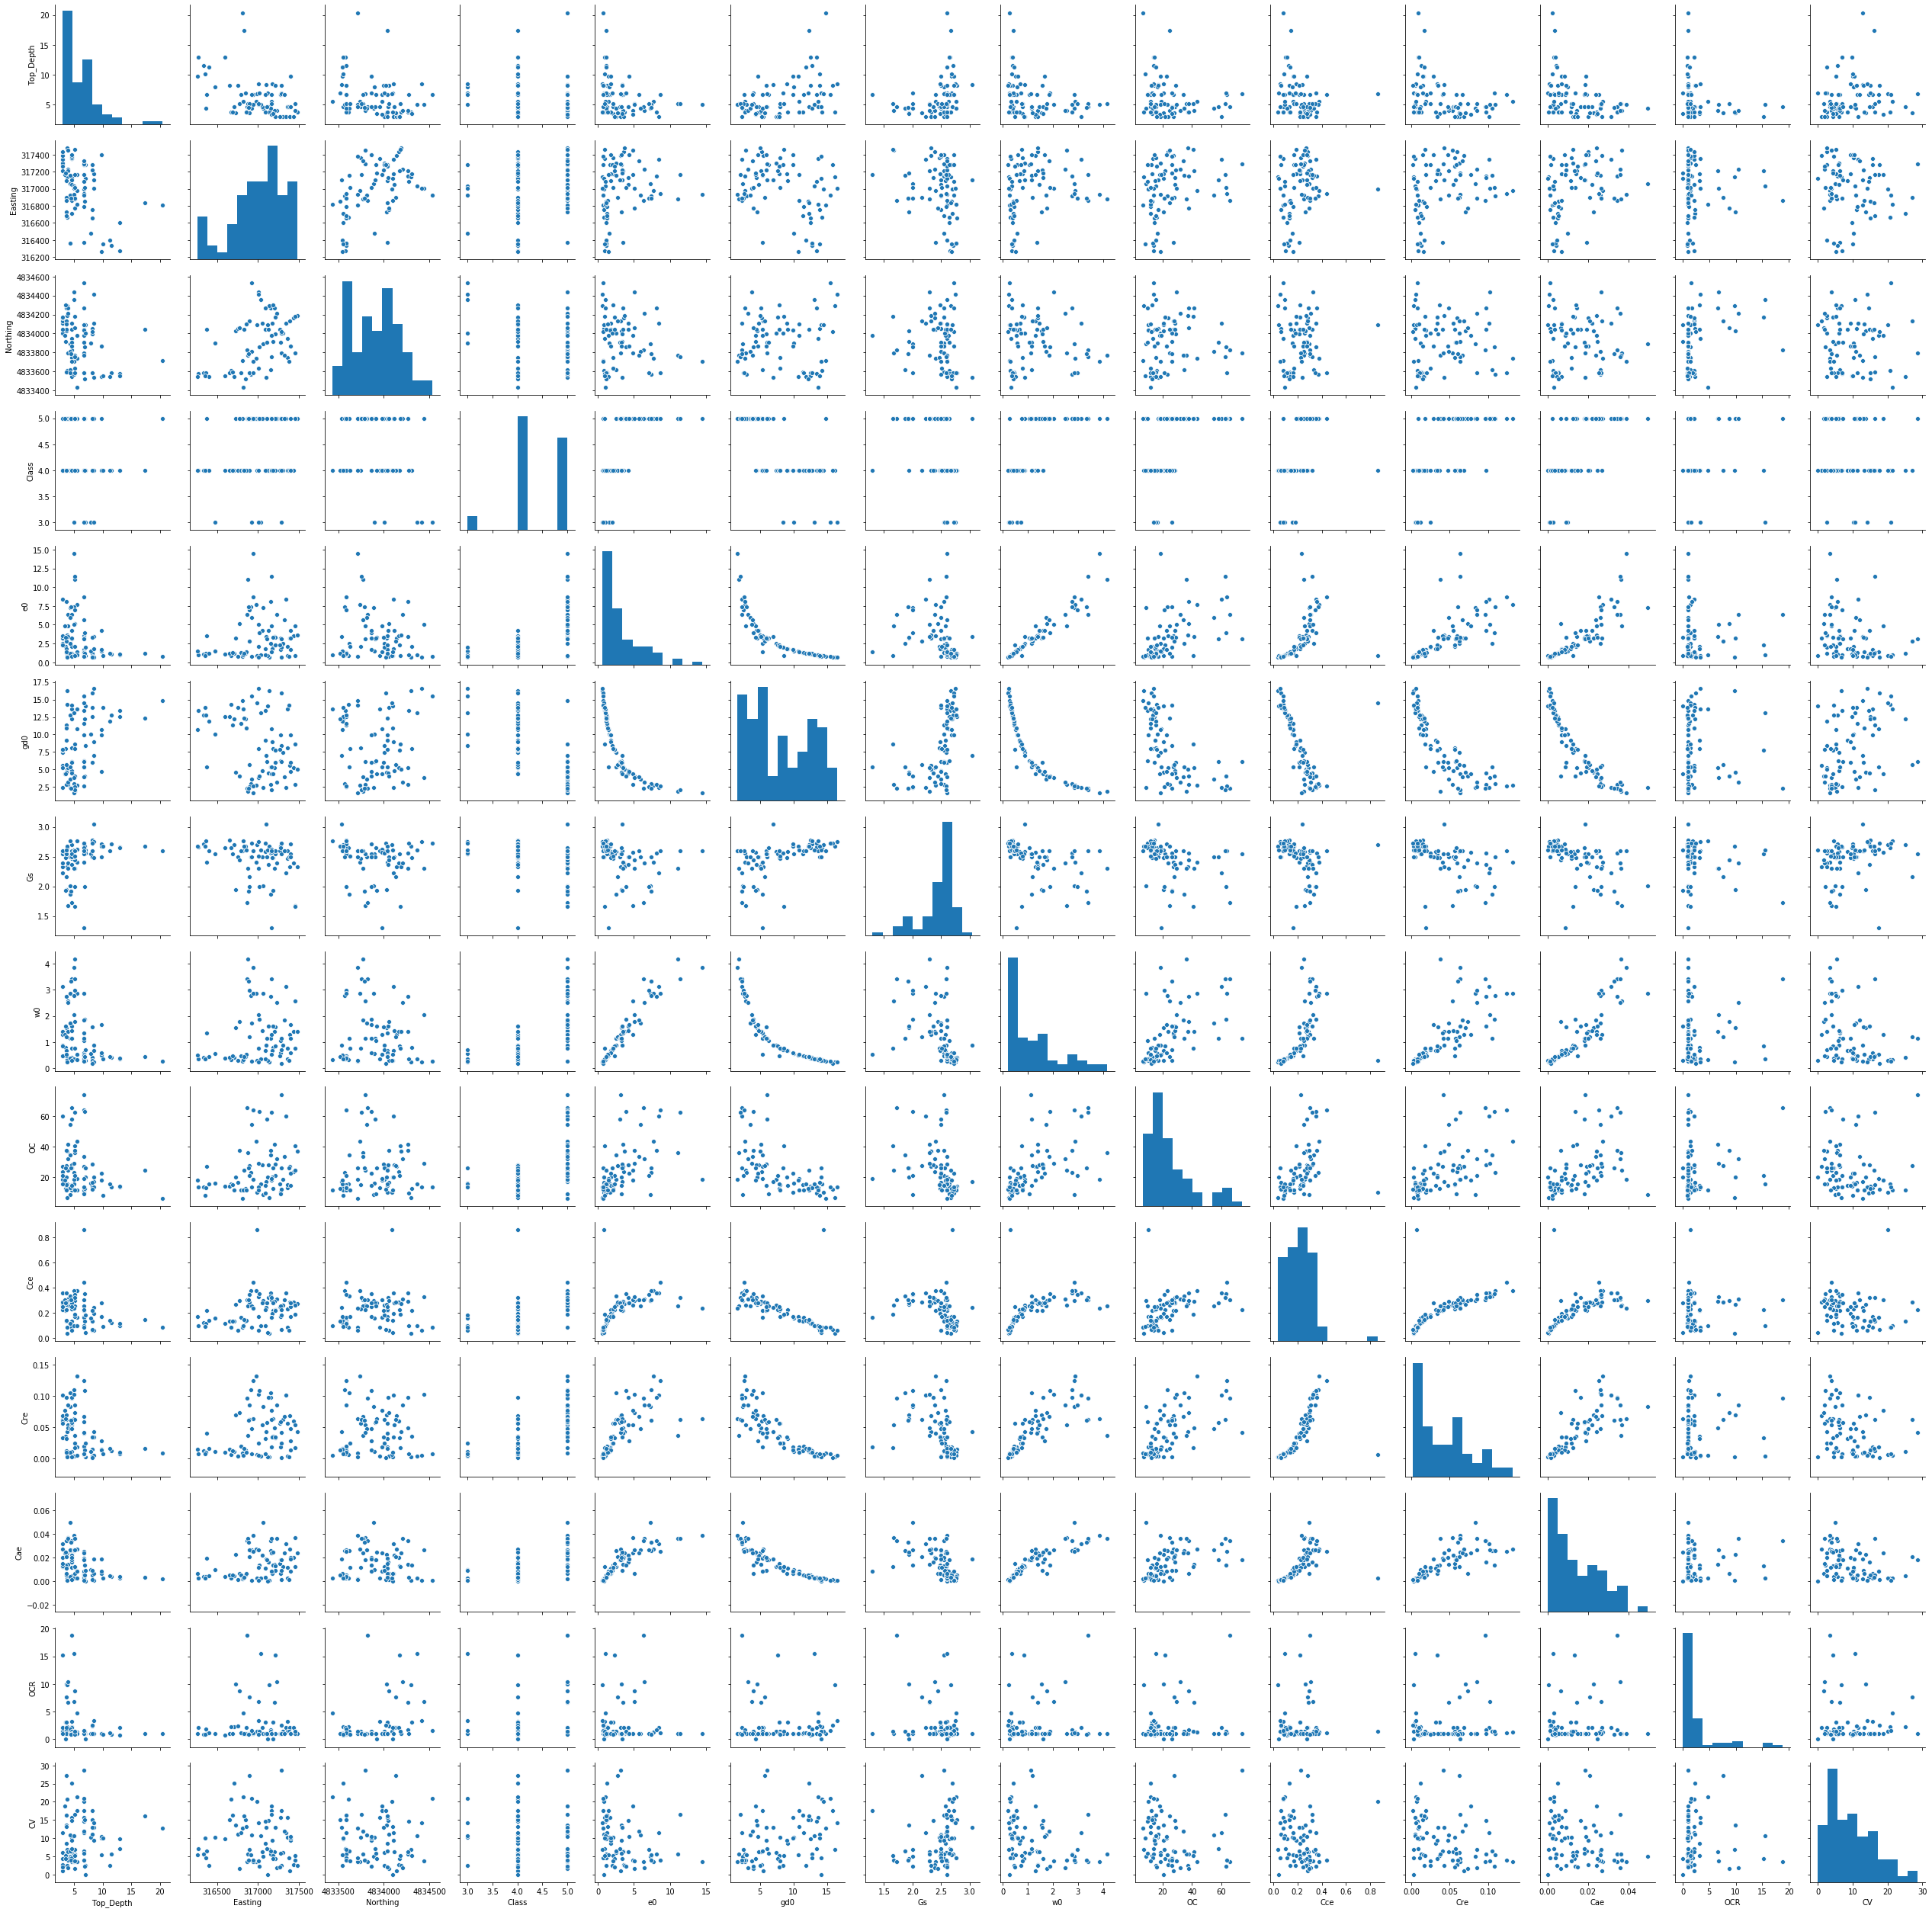

In [24]:
plt.figure(figsize=(20,20))
p=sns.pairplot(Geo_DB)
# The graph is not clear due to the number of subplots; Divide it into four pairplots

### The graph is not clear due to the number of subplots; Divide it into four pairplots

**First pair-plot : Top left corner**

C:\Users\User\Machine-Learning\Install\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Machine-Learning\Install\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1440x1440 with 0 Axes>

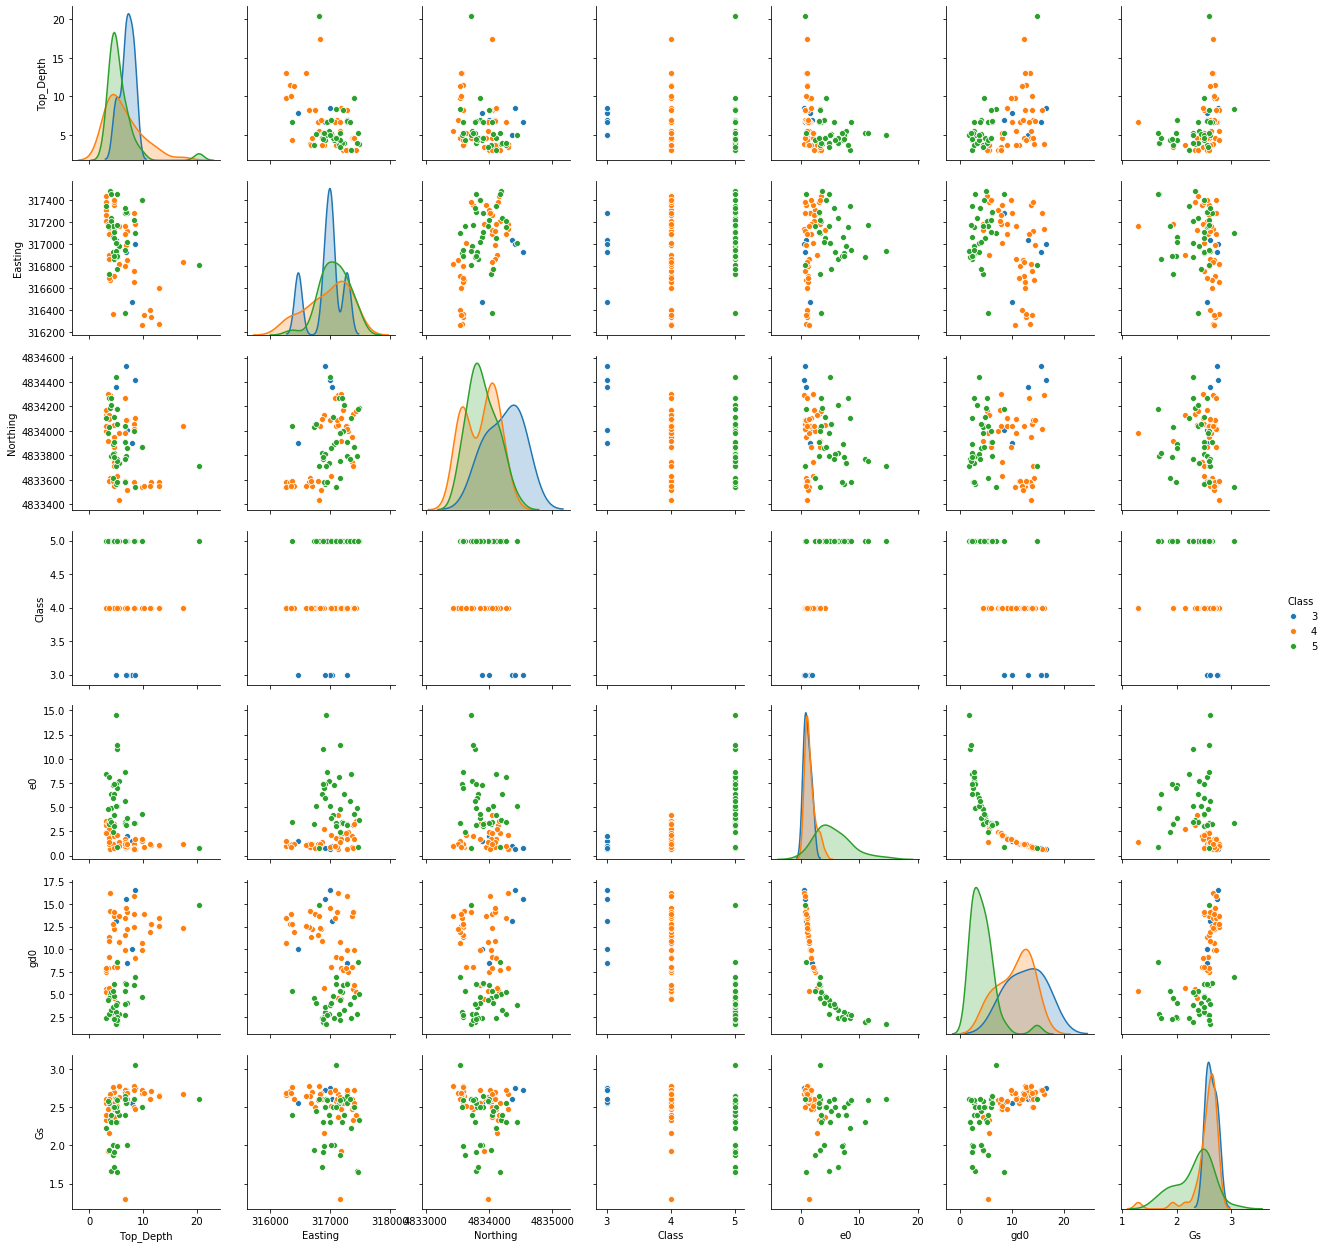

In [25]:
plt.figure(figsize=(20,20))
# top left corner of the original graph
p=sns.pairplot(Geo_DB,
               x_vars=['Top_Depth','Easting','Northing','Class','e0','gd0','Gs'],
               y_vars=['Top_Depth','Easting','Northing','Class','e0','gd0','Gs'],hue='Class')


**Second pair-plot : Top right corner**

<Figure size 1440x1440 with 0 Axes>

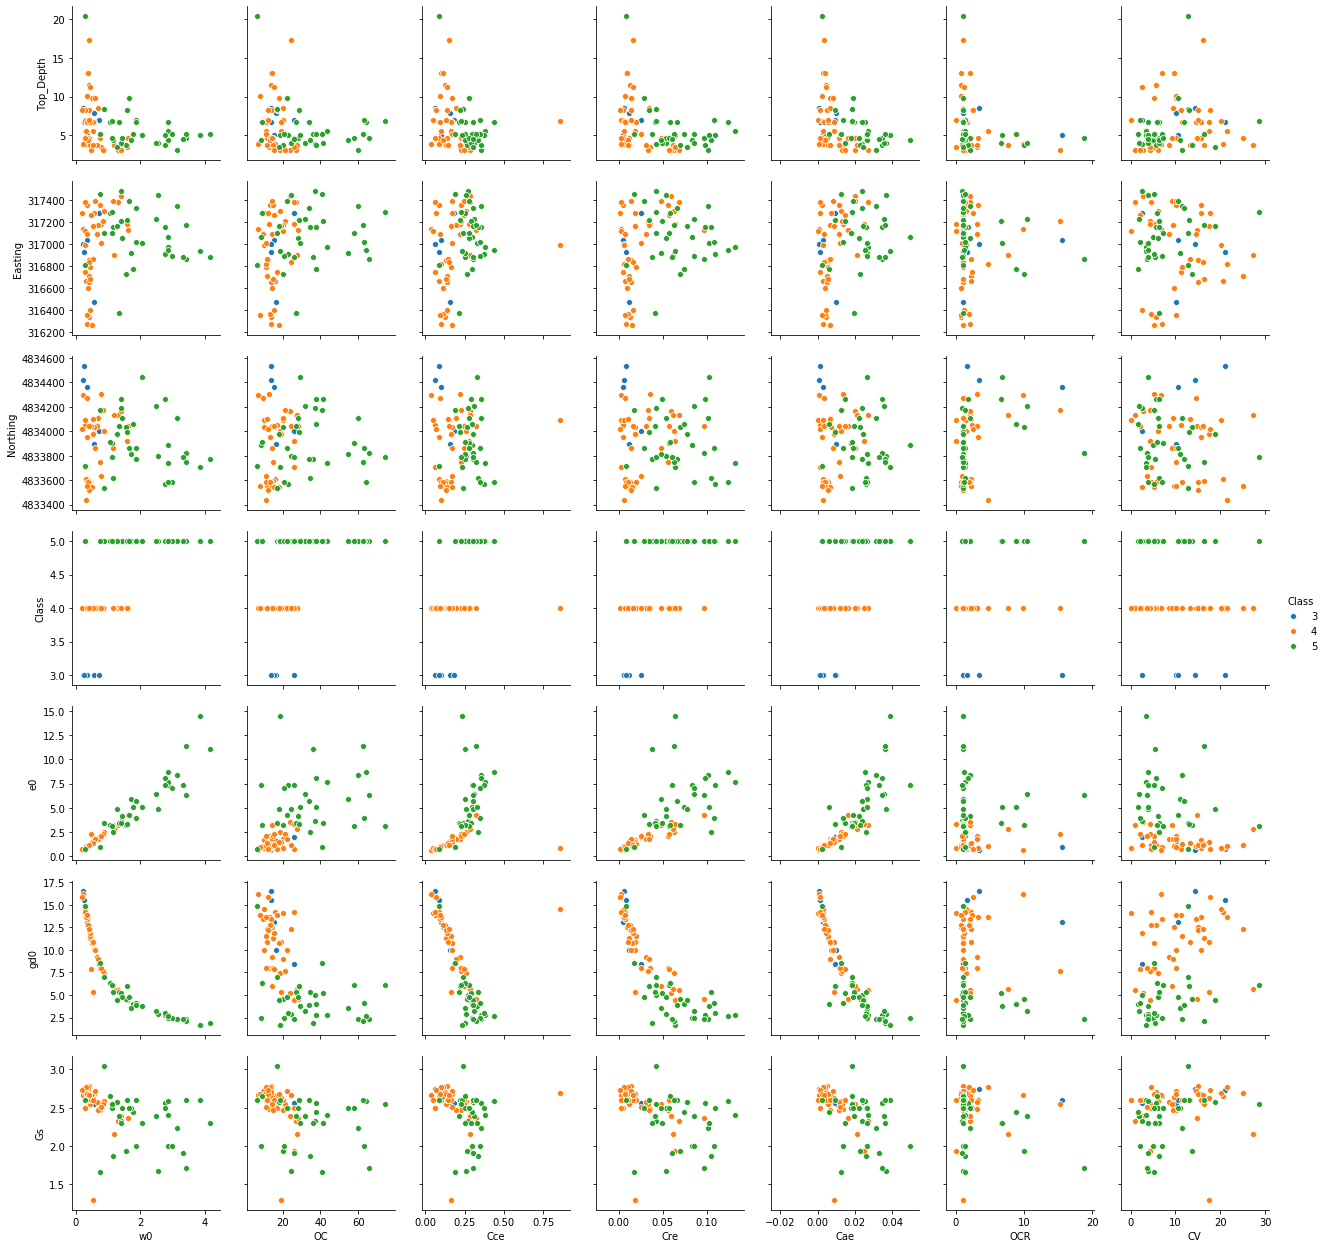

In [26]:
plt.figure(figsize=(20,20))
# top right corner of the original graph
p=sns.pairplot(Geo_DB,
               x_vars=['w0','OC','Cce','Cre','Cae','OCR','CV'],
               y_vars=['Top_Depth','Easting','Northing','Class','e0','gd0','Gs'],hue='Class')


**Third pair-plot : bottom left corner**

<Figure size 1440x1440 with 0 Axes>

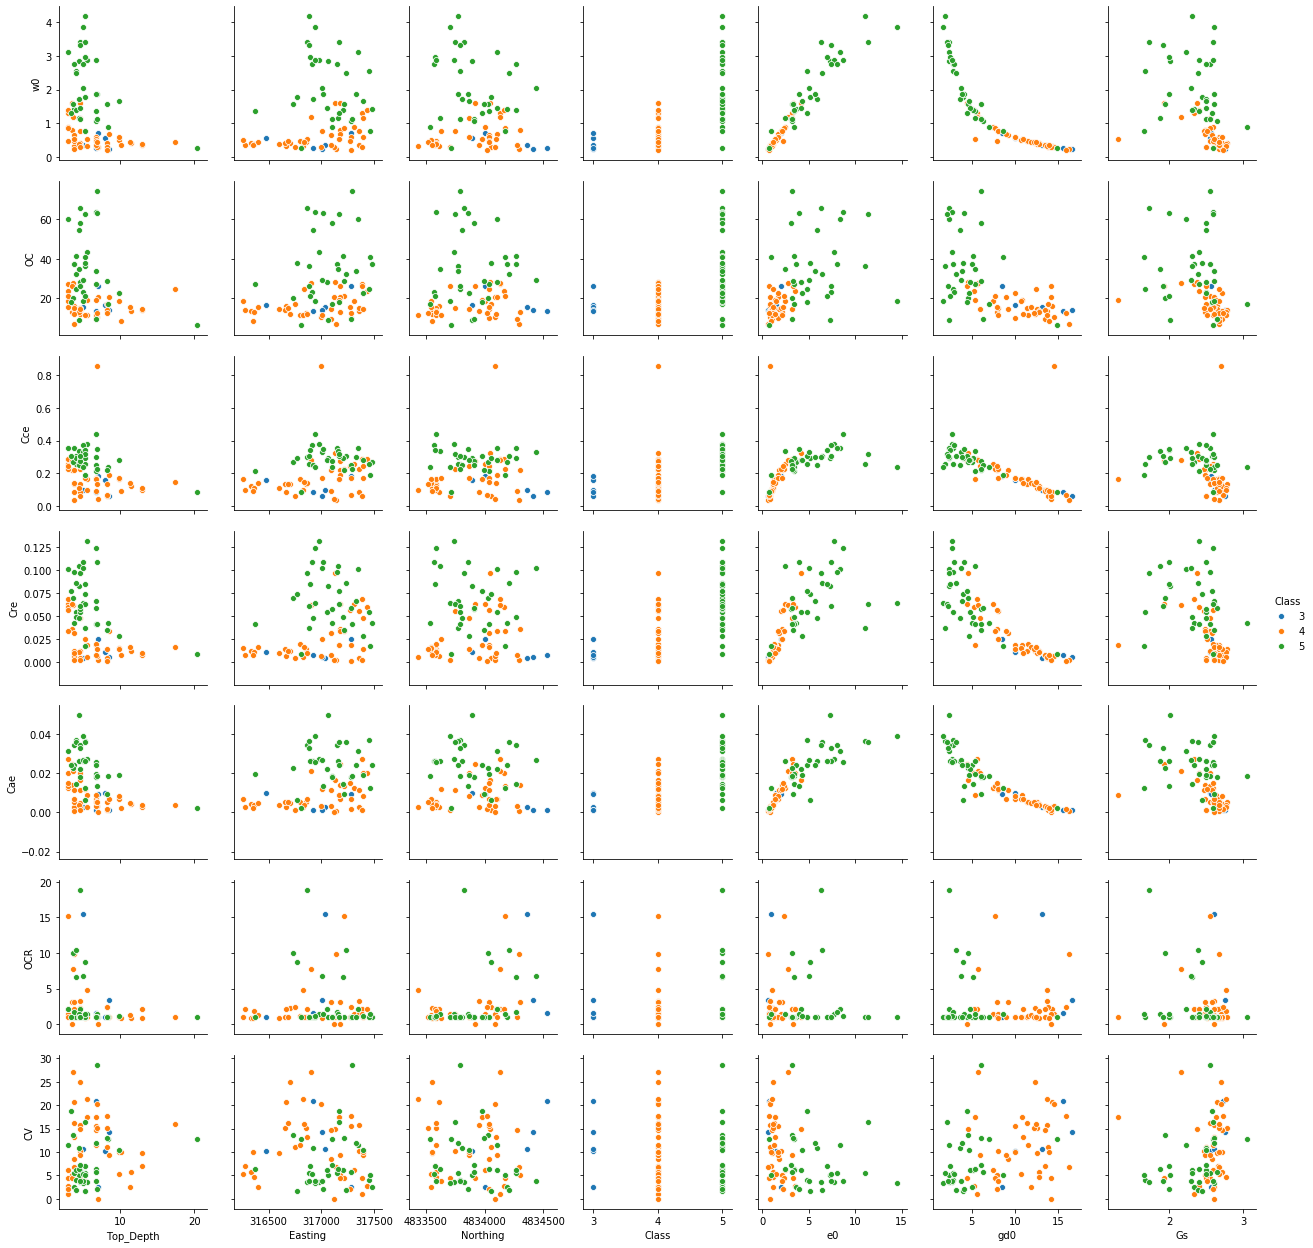

In [27]:
plt.figure(figsize=(20,20))
# bottom left corner of the original graph
p=sns.pairplot(Geo_DB,
               x_vars=['Top_Depth','Easting','Northing','Class','e0','gd0','Gs'],
               y_vars=['w0','OC','Cce','Cre','Cae','OCR','CV'],hue='Class')


**Fourth pair-plot : bottom right corner**

<Figure size 1440x1440 with 0 Axes>

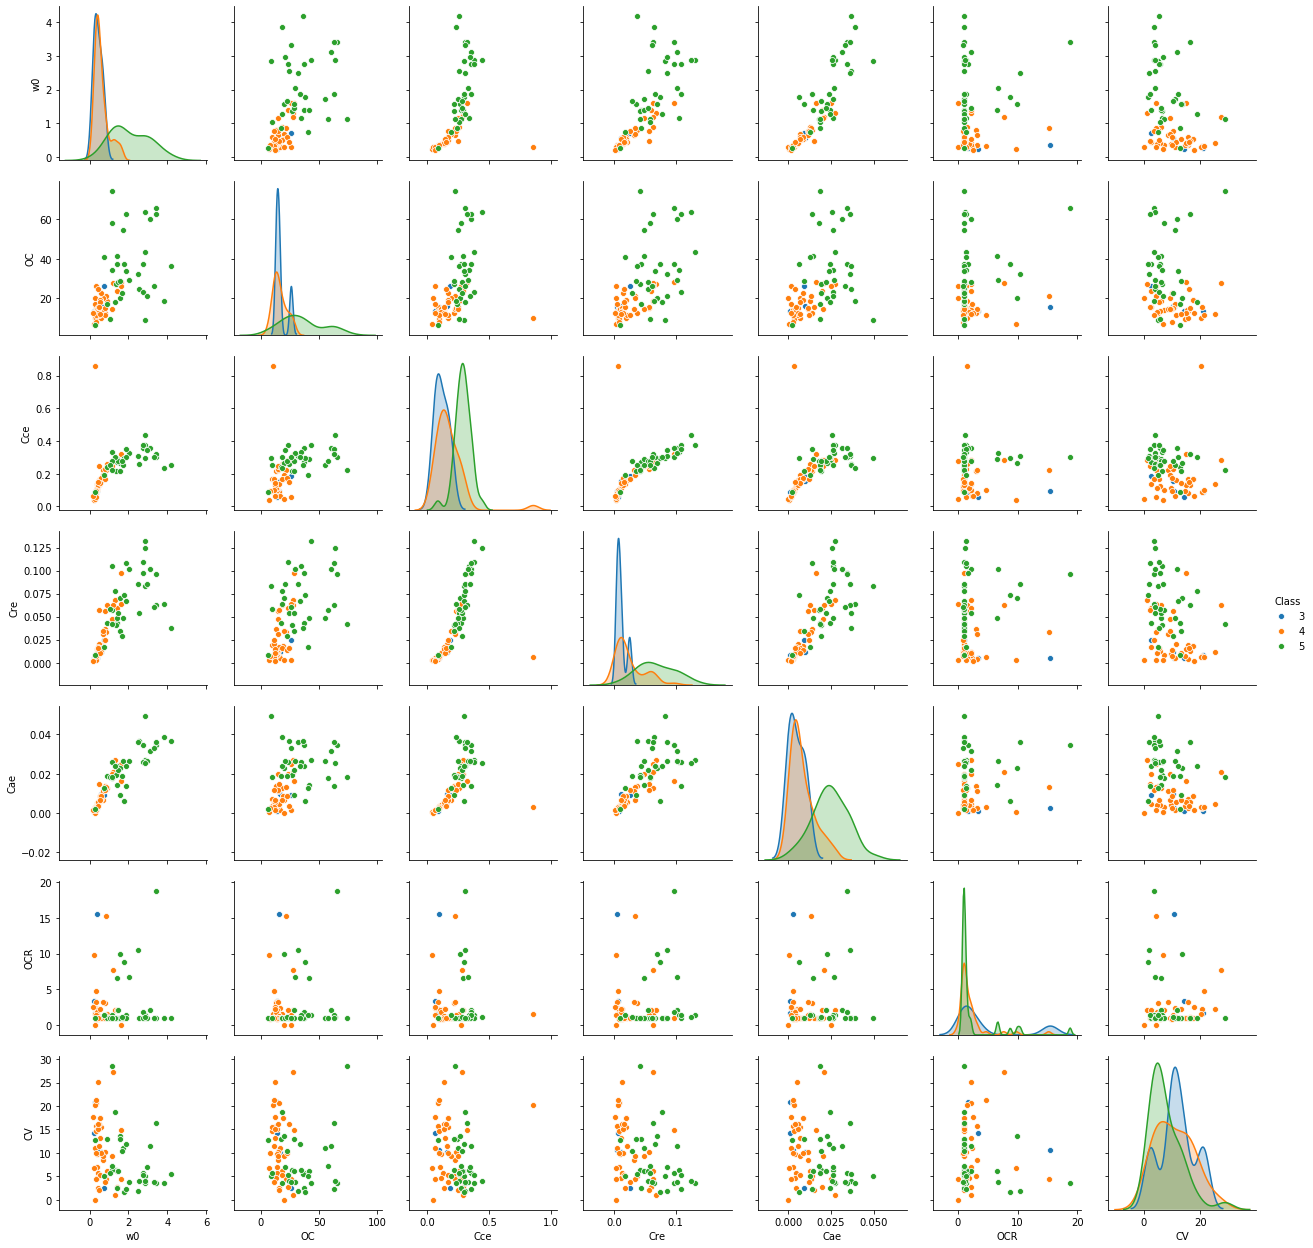

In [28]:
plt.figure(figsize=(20,20))
# bottom right corner of the original graph
p=sns.pairplot(Geo_DB,
               x_vars=['w0','OC','Cce','Cre','Cae','OCR','CV'],
               y_vars=['w0','OC','Cce','Cre','Cae','OCR','CV'],hue='Class')


### 2. Data Preparation

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Scale all the features with standerd scaler
scaler=StandardScaler()
X=scaler.fit_transform(Geo_DB[features])
y=Geo_DB[targets]

In [31]:
print(X.shape,'-',y.shape)

(81, 9) - (81, 5)


In [32]:
#Split the data into Train, Validation, and Test
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, test_size=0.2)

print('Geo_DB Size:',Geo_DB.shape,'\n')
print('X Train Size:',X_train.shape,'\n'
      'X Validation Size:',X_valid.shape,'\n'
      'X Test Size',X_test.shape,'\n','\n'
      'y Train size:',y_train.shape,'\n'
      'y Validation Size:',y_valid.shape,'\n'
      'y Test Size:',y_test.shape)

Geo_DB Size: (81, 14) 

X Train Size: (51, 9) 
X Validation Size: (13, 9) 
X Test Size (17, 9) 
 
y Train size: (51, 5) 
y Validation Size: (13, 5) 
y Test Size: (17, 5)


In [33]:
y_valid

,Cce,Cre,Cae,OCR,CV
40,0.169988,0.018839,0.006942,1.000000,15.617973
67,0.058722,0.002823,0.001347,1.428571,4.472518
87,0.140845,0.010089,0.006729,2.180000,13.225672
10,0.271155,0.042933,0.024085,0.975610,2.495433
64,0.439404,0.124203,0.025500,1.171429,3.923386
41,0.217930,0.034747,0.009302,1.000000,13.048812
85,0.085801,0.007985,0.001033,1.629048,20.955367
35,0.334872,0.105054,0.026000,1.382979,6.366513
7,0.285821,0.068445,0.027073,2.149254,0.985606
55,0.329484,0.102211,0.026491,6.761232,3.812342


### 3. Neural Network Model

In [135]:
# Importing Neural Network libraries
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score

In [136]:
# Building a general Neural Network Model
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape= X_train.shape[1:]))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
   
    #number of output is 5: targets=['Cce','Cre','Cae','OCR','CV']
    model.add(keras.layers.Dense(5,name='outout',activation='relu'))
    
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model 

In [137]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

#### 3.1 Train the Model

In [138]:
y_train = np.asarray(y_train)
y_valid = np.asarray(y_valid)
y_test = np.asarray(y_test)

In [139]:
history =keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Train on 51 samples, validate on 13 samples
Epoch 1/100
51/51 [==============================] - 0s 8ms/sample - loss: 31.8879 - val_loss: 22.7004
Epoch 2/100
51/51 [==============================] - 0s 314us/sample - loss: 31.8294 - val_loss: 22.6261
Epoch 3/100
51/51 [==============================] - 0s 353us/sample - loss: 31.7708 - val_loss: 22.5392
Epoch 4/100
51/51 [==============================] - 0s 353us/sample - loss: 31.7021 - val_loss: 22.4447
Epoch 5/100
51/51 [==============================] - 0s 353us/sample - loss: 31.6295 - val_loss: 22.3552
Epoch 6/100
51/51 [==============================] - 0s 392us/sample - loss: 31.5552 - val_loss: 22.2531
Epoch 7/100
51/51 [==============================] - 0s 392us/sample - loss: 31.4736 - val_loss: 22.1550
Epoch 8/100
51/51 [==============================] - 0s 372us/sample - loss: 31.3926 - val_loss: 22.0620
Epoch 9/100
51/51 [==============================] - 0s 411us/sample - loss: 31.3138 - val_loss: 21.9661
Epoch 10/100


51/51 [==============================] - 0s 412us/sample - loss: 14.6141 - val_loss: 9.0471
Epoch 78/100
51/51 [==============================] - 0s 411us/sample - loss: 14.4201 - val_loss: 8.9424
Epoch 79/100
51/51 [==============================] - 0s 490us/sample - loss: 14.2127 - val_loss: 8.8461
Epoch 80/100
51/51 [==============================] - 0s 412us/sample - loss: 14.0262 - val_loss: 8.7431
Epoch 81/100
51/51 [==============================] - 0s 451us/sample - loss: 13.8373 - val_loss: 8.6572
Epoch 82/100
51/51 [==============================] - 0s 333us/sample - loss: 13.6569 - val_loss: 8.5822
Epoch 83/100
51/51 [==============================] - 0s 392us/sample - loss: 13.4863 - val_loss: 8.5008
Epoch 84/100
51/51 [==============================] - 0s 372us/sample - loss: 13.3350 - val_loss: 8.4062
Epoch 85/100
51/51 [==============================] - 0s 392us/sample - loss: 13.1714 - val_loss: 8.3573
Epoch 86/100
51/51 [==============================] - 0s 451us/sampl

In [140]:
pd.DataFrame(history.history).head(5)

,loss,val_loss
0,31.887917,22.700443
1,31.829430,22.626118
2,31.770781,22.539171
3,31.702070,22.444702
4,31.629508,22.355225


In [141]:
pd.DataFrame(history.history).tail(5)

,loss,val_loss
95,11.902340,7.998980
96,11.799108,7.986503
97,11.694821,7.973719
98,11.597710,7.983088
99,11.514337,7.978044


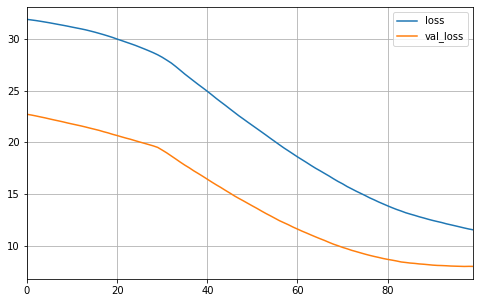

In [142]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

#### 3.2 Fine Tune the Model

In [143]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3,4],
    "n_neurons": np.arange(1, 200),
    "learning_rate": reciprocal(3e-4, 3e-2),
}


rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=20, cv=5)

rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 40 samples, validate on 13 samples
Epoch 1/100
40/40 [==============================] - 0s 11ms/sample - loss: 28.4575 - val_loss: 23.3166
Epoch 2/100
40/40 [==============================] - 0s 425us/sample - loss: 28.2377 - val_loss: 23.0988
Epoch 3/100
40/40 [==============================] - 0s 525us/sample - loss: 27.9422 - val_loss: 22.8088
Epoch 4/100
40/40 [==============================] - 0s 525us/sample - loss: 27.5746 - val_loss: 22.3928
Epoch 5/100
40/40 [==============================] - 0s 499us/sample - loss: 27.1521 - val_loss: 21.9986
Epoch 6/100
40/40 [==============================] - 0s 500us/sample - loss: 26.7599 - val_loss: 21.6236
Epoch 7/100
40/40 [==============================] - 0s 475us/sample - loss: 26.3697 - val_loss: 21.2263
Epoch 8/100
40/40 [==============================] - 0s 525us/sample - loss: 25.9471 - val_loss: 20.7728
Epoch 9/100
40/40 [==============================] - 0s 550us/sample - loss: 25.4872 - val_loss: 20.3466
Epoch 10/100

41/41 [==============================] - 0s 561us/sample - loss: 28.7366 - val_loss: 17.8613
Epoch 27/100
41/41 [==============================] - 0s 488us/sample - loss: 28.3789 - val_loss: 17.5567
Epoch 28/100
41/41 [==============================] - 0s 536us/sample - loss: 27.9760 - val_loss: 17.2479
Epoch 29/100
41/41 [==============================] - 0s 561us/sample - loss: 27.5710 - val_loss: 16.9567
Epoch 30/100
41/41 [==============================] - 0s 658us/sample - loss: 27.1769 - val_loss: 16.6531
Epoch 31/100
41/41 [==============================] - 0s 585us/sample - loss: 26.7619 - val_loss: 16.3337
Epoch 32/100
41/41 [==============================] - 0s 463us/sample - loss: 26.3292 - val_loss: 16.0097
Epoch 33/100
41/41 [==============================] - 0s 512us/sample - loss: 25.8803 - val_loss: 15.6506
Epoch 34/100
41/41 [==============================] - 0s 561us/sample - loss: 25.3810 - val_loss: 15.2497
Epoch 35/100
41/41 [==============================] - ETA: 

Epoch 41/100
41/41 [==============================] - 0s 512us/sample - loss: 32.1405 - val_loss: 23.4543
Epoch 42/100
41/41 [==============================] - 0s 414us/sample - loss: 32.1404 - val_loss: 23.4542
Epoch 43/100
41/41 [==============================] - ETA: 0s - loss: 36.84 - 0s 512us/sample - loss: 32.1404 - val_loss: 23.4541
Epoch 44/100
41/41 [==============================] - 0s 512us/sample - loss: 32.1403 - val_loss: 23.4540
Epoch 45/100
41/41 [==============================] - 0s 488us/sample - loss: 32.1402 - val_loss: 23.4539
Epoch 46/100
41/41 [==============================] - 0s 463us/sample - loss: 32.1401 - val_loss: 23.4539
Epoch 47/100
41/41 [==============================] - 0s 512us/sample - loss: 32.1401 - val_loss: 23.4538
Epoch 48/100
41/41 [==============================] - 0s 536us/sample - loss: 32.1400 - val_loss: 23.4537
Epoch 49/100
41/41 [==============================] - 0s 439us/sample - loss: 32.1400 - val_loss: 23.4537
Epoch 50/100
41/41 [==

41/41 [==============================] - 0s 439us/sample - loss: 29.2200 - val_loss: 21.1331
Epoch 15/100
41/41 [==============================] - 0s 585us/sample - loss: 28.9780 - val_loss: 20.9277
Epoch 16/100
41/41 [==============================] - 0s 488us/sample - loss: 28.7370 - val_loss: 20.6948
Epoch 17/100
41/41 [==============================] - 0s 585us/sample - loss: 28.4681 - val_loss: 20.4650
Epoch 18/100
41/41 [==============================] - 0s 463us/sample - loss: 28.2022 - val_loss: 20.2410
Epoch 19/100
41/41 [==============================] - 0s 536us/sample - loss: 27.9294 - val_loss: 19.9743
Epoch 20/100
41/41 [==============================] - 0s 536us/sample - loss: 27.6084 - val_loss: 19.6883
Epoch 21/100
41/41 [==============================] - 0s 512us/sample - loss: 27.2583 - val_loss: 19.4025
Epoch 22/100
41/41 [==============================] - 0s 463us/sample - loss: 26.8813 - val_loss: 19.0975
Epoch 23/100
41/41 [==============================] - 0s 46

Epoch 38/100
41/41 [==============================] - 0s 512us/sample - loss: 21.6270 - val_loss: 13.4571
Epoch 39/100
41/41 [==============================] - 0s 439us/sample - loss: 21.0758 - val_loss: 13.0568
Epoch 40/100
41/41 [==============================] - 0s 512us/sample - loss: 20.5547 - val_loss: 12.6700
Epoch 41/100
41/41 [==============================] - 0s 536us/sample - loss: 20.0291 - val_loss: 12.2642
Epoch 42/100
41/41 [==============================] - 0s 488us/sample - loss: 19.4832 - val_loss: 11.8339
Epoch 43/100
41/41 [==============================] - 0s 488us/sample - loss: 18.9083 - val_loss: 11.3947
Epoch 44/100
41/41 [==============================] - 0s 536us/sample - loss: 18.3339 - val_loss: 11.0141
Epoch 45/100
41/41 [==============================] - 0s 488us/sample - loss: 17.7927 - val_loss: 10.5289
Epoch 46/100
41/41 [==============================] - 0s 512us/sample - loss: 17.0444 - val_loss: 10.0680
Epoch 47/100
41/41 [==========================

Epoch 40/100
40/40 [==============================] - 0s 550us/sample - loss: 24.7242 - val_loss: 19.8170
Epoch 41/100
40/40 [==============================] - 0s 575us/sample - loss: 24.6205 - val_loss: 19.6995
Epoch 42/100
40/40 [==============================] - 0s 575us/sample - loss: 24.4960 - val_loss: 19.6098
Epoch 43/100
40/40 [==============================] - 0s 500us/sample - loss: 24.3949 - val_loss: 19.4974
Epoch 44/100
40/40 [==============================] - 0s 550us/sample - loss: 24.2736 - val_loss: 19.3889
Epoch 45/100
40/40 [==============================] - 0s 500us/sample - loss: 24.1600 - val_loss: 19.2863
Epoch 46/100
40/40 [==============================] - 0s 550us/sample - loss: 24.0505 - val_loss: 19.1782
Epoch 47/100
40/40 [==============================] - 0s 575us/sample - loss: 23.9326 - val_loss: 19.0617
Epoch 48/100
40/40 [==============================] - 0s 525us/sample - loss: 23.8066 - val_loss: 18.9481
Epoch 49/100
40/40 [==========================

41/41 [==============================] - 0s 463us/sample - loss: 33.4920 - val_loss: 21.5699
Epoch 14/100
41/41 [==============================] - 0s 536us/sample - loss: 33.3719 - val_loss: 21.4790
Epoch 15/100
41/41 [==============================] - 0s 488us/sample - loss: 33.2613 - val_loss: 21.3860
Epoch 16/100
41/41 [==============================] - 0s 609us/sample - loss: 33.1449 - val_loss: 21.2815
Epoch 17/100
41/41 [==============================] - 0s 561us/sample - loss: 33.0161 - val_loss: 21.1762
Epoch 18/100
41/41 [==============================] - 0s 439us/sample - loss: 32.8814 - val_loss: 21.0582
Epoch 19/100
41/41 [==============================] - 0s 536us/sample - loss: 32.7409 - val_loss: 20.9539
Epoch 20/100
41/41 [==============================] - 0s 536us/sample - loss: 32.6086 - val_loss: 20.8404
Epoch 21/100
41/41 [==============================] - 0s 536us/sample - loss: 32.4655 - val_loss: 20.7127
Epoch 22/100
41/41 [==============================] - 0s 53

41/41 [==============================] - 0s 512us/sample - loss: 16.7936 - val_loss: 9.1321
Epoch 91/100
41/41 [==============================] - 0s 536us/sample - loss: 16.6031 - val_loss: 9.0433
Epoch 92/100
41/41 [==============================] - 0s 512us/sample - loss: 16.4251 - val_loss: 8.9100
Epoch 93/100
41/41 [==============================] - 0s 536us/sample - loss: 16.1610 - val_loss: 8.7933
Epoch 94/100
41/41 [==============================] - 0s 488us/sample - loss: 15.9390 - val_loss: 8.6705
Epoch 95/100
41/41 [==============================] - 0s 561us/sample - loss: 15.7081 - val_loss: 8.5875
Epoch 96/100
41/41 [==============================] - 0s 488us/sample - loss: 15.5286 - val_loss: 8.5083
Epoch 97/100
41/41 [==============================] - 0s 561us/sample - loss: 15.3384 - val_loss: 8.4241
Epoch 98/100
41/41 [==============================] - 0s 463us/sample - loss: 15.1512 - val_loss: 8.3735
Epoch 99/100
41/41 [==============================] - 0s 512us/sampl

Epoch 64/100
41/41 [==============================] - 0s 488us/sample - loss: 24.1459 - val_loss: 16.6797
Epoch 65/100
41/41 [==============================] - 0s 536us/sample - loss: 23.9421 - val_loss: 16.5058
Epoch 66/100
41/41 [==============================] - 0s 561us/sample - loss: 23.7145 - val_loss: 16.3074
Epoch 67/100
41/41 [==============================] - 0s 561us/sample - loss: 23.4690 - val_loss: 16.1441
Epoch 68/100
41/41 [==============================] - 0s 536us/sample - loss: 23.2630 - val_loss: 15.9890
Epoch 69/100
41/41 [==============================] - 0s 463us/sample - loss: 23.0539 - val_loss: 15.7915
Epoch 70/100
41/41 [==============================] - 0s 536us/sample - loss: 22.8106 - val_loss: 15.6300
Epoch 71/100
41/41 [==============================] - 0s 463us/sample - loss: 22.5950 - val_loss: 15.4381
Epoch 72/100
41/41 [==============================] - 0s 463us/sample - loss: 22.3624 - val_loss: 15.2849
Epoch 73/100
41/41 [==========================

Epoch 38/100
41/41 [==============================] - 0s 488us/sample - loss: 27.7938 - val_loss: 19.8704
Epoch 39/100
41/41 [==============================] - 0s 512us/sample - loss: 27.6775 - val_loss: 19.7658
Epoch 40/100
41/41 [==============================] - ETA: 0s - loss: 24.45 - 0s 609us/sample - loss: 27.5536 - val_loss: 19.6444
Epoch 41/100
41/41 [==============================] - 0s 439us/sample - loss: 27.4137 - val_loss: 19.5327
Epoch 42/100
41/41 [==============================] - 0s 463us/sample - loss: 27.2853 - val_loss: 19.4242
Epoch 43/100
41/41 [==============================] - 0s 439us/sample - loss: 27.1595 - val_loss: 19.3006
Epoch 44/100
41/41 [==============================] - 0s 512us/sample - loss: 27.0195 - val_loss: 19.1868
Epoch 45/100
41/41 [==============================] - 0s 609us/sample - loss: 26.8883 - val_loss: 19.0721
Epoch 46/100
41/41 [==============================] - 0s 536us/sample - loss: 26.7522 - val_loss: 18.9361
Epoch 47/100
41/41 [==

41/41 [==============================] - 0s 561us/sample - loss: 33.6607 - val_loss: 23.3498
Epoch 12/100
41/41 [==============================] - 0s 561us/sample - loss: 33.6534 - val_loss: 23.3447
Epoch 13/100
41/41 [==============================] - 0s 536us/sample - loss: 33.6455 - val_loss: 23.3400
Epoch 14/100
41/41 [==============================] - 0s 585us/sample - loss: 33.6380 - val_loss: 23.3362
Epoch 15/100
41/41 [==============================] - 0s 512us/sample - loss: 33.6314 - val_loss: 23.3322
Epoch 16/100
41/41 [==============================] - 0s 585us/sample - loss: 33.6246 - val_loss: 23.3279
Epoch 17/100
41/41 [==============================] - 0s 512us/sample - loss: 33.6179 - val_loss: 23.3243
Epoch 18/100
41/41 [==============================] - 0s 488us/sample - loss: 33.6115 - val_loss: 23.3193
Epoch 19/100
41/41 [==============================] - 0s 488us/sample - loss: 33.6040 - val_loss: 23.3155
Epoch 20/100
41/41 [==============================] - 0s 51

41/41 [==============================] - 0s 536us/sample - loss: 29.9971 - val_loss: 20.2808
Epoch 89/100
41/41 [==============================] - 0s 488us/sample - loss: 29.8499 - val_loss: 20.1499
Epoch 90/100
41/41 [==============================] - 0s 512us/sample - loss: 29.6938 - val_loss: 20.0059
Epoch 91/100
41/41 [==============================] - 0s 585us/sample - loss: 29.5314 - val_loss: 19.8811
Epoch 92/100
41/41 [==============================] - 0s 561us/sample - loss: 29.3879 - val_loss: 19.7631
Epoch 93/100
41/41 [==============================] - 0s 463us/sample - loss: 29.2476 - val_loss: 19.6336
Epoch 94/100
41/41 [==============================] - 0s 487us/sample - loss: 29.0964 - val_loss: 19.5051
Epoch 95/100
41/41 [==============================] - 0s 488us/sample - loss: 28.9456 - val_loss: 19.3721
Epoch 96/100
41/41 [==============================] - 0s 536us/sample - loss: 28.7935 - val_loss: 19.2391
Epoch 97/100
41/41 [==============================] - 0s 60

41/41 [==============================] - 0s 536us/sample - loss: 27.7898 - val_loss: 16.8976
Epoch 11/100
41/41 [==============================] - 0s 439us/sample - loss: 26.7041 - val_loss: 16.1375
Epoch 12/100
41/41 [==============================] - 0s 414us/sample - loss: 25.6352 - val_loss: 15.2362
Epoch 13/100
41/41 [==============================] - 0s 414us/sample - loss: 24.4780 - val_loss: 14.5087
Epoch 14/100
41/41 [==============================] - 0s 463us/sample - loss: 23.4704 - val_loss: 13.6990
Epoch 15/100
41/41 [==============================] - 0s 414us/sample - loss: 22.4270 - val_loss: 12.9904
Epoch 16/100
41/41 [==============================] - 0s 488us/sample - loss: 21.4896 - val_loss: 12.4560
Epoch 17/100
41/41 [==============================] - 0s 439us/sample - loss: 20.7012 - val_loss: 11.8520
Epoch 18/100
41/41 [==============================] - 0s 439us/sample - loss: 19.7401 - val_loss: 11.3062
Epoch 19/100
41/41 [==============================] - 0s 48

41/41 [==============================] - 0s 512us/sample - loss: 10.4128 - val_loss: 7.5299
Epoch 39/100
41/41 [==============================] - 0s 512us/sample - loss: 10.3108 - val_loss: 7.5248
Epoch 40/100
41/41 [==============================] - 0s 488us/sample - loss: 10.1975 - val_loss: 7.5588
Epoch 41/100
41/41 [==============================] - 0s 609us/sample - loss: 10.0665 - val_loss: 7.5961
Epoch 42/100
41/41 [==============================] - 0s 561us/sample - loss: 9.9627 - val_loss: 7.6134
Epoch 43/100
41/41 [==============================] - 0s 463us/sample - loss: 9.8621 - val_loss: 7.6143
Epoch 44/100
41/41 [==============================] - 0s 512us/sample - loss: 9.8004 - val_loss: 7.6592
Epoch 45/100
41/41 [==============================] - 0s 463us/sample - loss: 9.7026 - val_loss: 7.6811
Epoch 46/100
10/1 [==============================================================================================================================================================

Epoch 20/100
41/41 [==============================] - 0s 512us/sample - loss: 22.1985 - val_loss: 12.1994
Epoch 21/100
41/41 [==============================] - 0s 488us/sample - loss: 21.3875 - val_loss: 11.6742
Epoch 22/100
41/41 [==============================] - 0s 439us/sample - loss: 20.7454 - val_loss: 11.0189
Epoch 23/100
41/41 [==============================] - 0s 488us/sample - loss: 19.9786 - val_loss: 10.4188
Epoch 24/100
41/41 [==============================] - 0s 561us/sample - loss: 19.2571 - val_loss: 9.8954
Epoch 25/100
41/41 [==============================] - 0s 463us/sample - loss: 18.5688 - val_loss: 9.4484
Epoch 26/100
41/41 [==============================] - 0s 463us/sample - loss: 18.0132 - val_loss: 9.0671
Epoch 27/100
41/41 [==============================] - 0s 414us/sample - loss: 17.4760 - val_loss: 8.7502
Epoch 28/100
41/41 [==============================] - 0s 414us/sample - loss: 16.9868 - val_loss: 8.4370
Epoch 29/100
41/41 [==============================]

Epoch 45/100
40/40 [==============================] - 0s 500us/sample - loss: 20.6576 - val_loss: 17.2257
Epoch 46/100
40/40 [==============================] - 0s 450us/sample - loss: 20.4146 - val_loss: 16.9873
Epoch 47/100
40/40 [==============================] - ETA: 0s - loss: 16.94 - 0s 500us/sample - loss: 20.1321 - val_loss: 16.7847
Epoch 48/100
40/40 [==============================] - 0s 550us/sample - loss: 19.8696 - val_loss: 16.5966
Epoch 49/100
40/40 [==============================] - 0s 425us/sample - loss: 19.6415 - val_loss: 16.4169
Epoch 50/100
40/40 [==============================] - 0s 550us/sample - loss: 19.4226 - val_loss: 16.2109
Epoch 51/100
40/40 [==============================] - 0s 450us/sample - loss: 19.1719 - val_loss: 15.9632
Epoch 52/100
40/40 [==============================] - 0s 450us/sample - loss: 18.8824 - val_loss: 15.7389
Epoch 53/100
40/40 [==============================] - 0s 450us/sample - loss: 18.6321 - val_loss: 15.4971
Epoch 54/100
40/40 [==

41/41 [==============================] - 0s 439us/sample - loss: 28.1512 - val_loss: 17.6721
Epoch 19/100
41/41 [==============================] - 0s 414us/sample - loss: 27.8263 - val_loss: 17.4561
Epoch 20/100
41/41 [==============================] - 0s 512us/sample - loss: 27.5373 - val_loss: 17.2421
Epoch 21/100
41/41 [==============================] - 0s 488us/sample - loss: 27.2408 - val_loss: 17.0152
Epoch 22/100
41/41 [==============================] - 0s 536us/sample - loss: 26.9342 - val_loss: 16.7800
Epoch 23/100
41/41 [==============================] - 0s 463us/sample - loss: 26.6252 - val_loss: 16.5559
Epoch 24/100
41/41 [==============================] - 0s 488us/sample - loss: 26.3243 - val_loss: 16.3407
Epoch 25/100
41/41 [==============================] - 0s 463us/sample - loss: 26.0425 - val_loss: 16.1385
Epoch 26/100
41/41 [==============================] - 0s 439us/sample - loss: 25.7547 - val_loss: 15.8971
Epoch 27/100
41/41 [==============================] - 0s 48

Epoch 96/100
41/41 [==============================] - 0s 463us/sample - loss: 12.1000 - val_loss: 7.5805
Epoch 97/100
41/41 [==============================] - 0s 414us/sample - loss: 12.0172 - val_loss: 7.5649
Epoch 98/100
41/41 [==============================] - 0s 439us/sample - loss: 11.9566 - val_loss: 7.5420
Epoch 99/100
41/41 [==============================] - 0s 512us/sample - loss: 11.8720 - val_loss: 7.5351
Epoch 100/100
10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 300us/sample - loss: 8.4597
Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 1s 20ms/sample - loss: 30.6260 - val_loss: 21.9554
Epoch 2/100
41/41 [==============================] - 0s 438us/sample - loss: 

Epoch 70/100
41/41 [==============================] - 0s 463us/sample - loss: 15.3840 - val_loss: 10.0877
Epoch 71/100
41/41 [==============================] - 0s 488us/sample - loss: 15.2659 - val_loss: 9.9797
Epoch 72/100
41/41 [==============================] - 0s 487us/sample - loss: 15.1422 - val_loss: 9.8519
Epoch 73/100
41/41 [==============================] - 0s 439us/sample - loss: 14.9812 - val_loss: 9.7557
Epoch 74/100
41/41 [==============================] - 0s 488us/sample - loss: 14.8588 - val_loss: 9.6696
Epoch 75/100
41/41 [==============================] - 0s 463us/sample - loss: 14.7392 - val_loss: 9.5541
Epoch 76/100
41/41 [==============================] - 0s 488us/sample - loss: 14.5988 - val_loss: 9.4446
Epoch 77/100
41/41 [==============================] - 0s 414us/sample - loss: 14.4547 - val_loss: 9.3281
Epoch 78/100
41/41 [==============================] - 0s 414us/sample - loss: 14.3195 - val_loss: 9.2529
Epoch 79/100
41/41 [==============================] - 

Epoch 44/100
41/41 [==============================] - 0s 390us/sample - loss: 22.1431 - val_loss: 15.3578
Epoch 45/100
41/41 [==============================] - 0s 488us/sample - loss: 21.9220 - val_loss: 15.1384
Epoch 46/100
41/41 [==============================] - 0s 463us/sample - loss: 21.6615 - val_loss: 14.9474
Epoch 47/100
41/41 [==============================] - 0s 512us/sample - loss: 21.4250 - val_loss: 14.7667
Epoch 48/100
41/41 [==============================] - 0s 463us/sample - loss: 21.1883 - val_loss: 14.5821
Epoch 49/100
41/41 [==============================] - 0s 439us/sample - loss: 20.9562 - val_loss: 14.4164
Epoch 50/100
41/41 [==============================] - 0s 488us/sample - loss: 20.7463 - val_loss: 14.2258
Epoch 51/100
41/41 [==============================] - 0s 536us/sample - loss: 20.4971 - val_loss: 14.0595
Epoch 52/100
41/41 [==============================] - 0s 463us/sample - loss: 20.2763 - val_loss: 13.8912
Epoch 53/100
41/41 [==========================

41/41 [==============================] - 0s 439us/sample - loss: 28.4076 - val_loss: 18.7683
Epoch 18/100
41/41 [==============================] - 0s 439us/sample - loss: 28.1648 - val_loss: 18.5759
Epoch 19/100
41/41 [==============================] - 0s 439us/sample - loss: 27.9073 - val_loss: 18.3326
Epoch 20/100
41/41 [==============================] - 0s 487us/sample - loss: 27.6000 - val_loss: 18.1515
Epoch 21/100
41/41 [==============================] - 0s 463us/sample - loss: 27.3529 - val_loss: 17.9387
Epoch 22/100
41/41 [==============================] - 0s 488us/sample - loss: 27.0754 - val_loss: 17.7449
Epoch 23/100
41/41 [==============================] - 0s 439us/sample - loss: 26.8199 - val_loss: 17.5401
Epoch 24/100
41/41 [==============================] - 0s 463us/sample - loss: 26.5537 - val_loss: 17.3572
Epoch 25/100
41/41 [==============================] - 0s 512us/sample - loss: 26.3152 - val_loss: 17.1685
Epoch 26/100
41/41 [==============================] - 0s 48

41/41 [==============================] - 0s 488us/sample - loss: 13.6162 - val_loss: 8.8261
Epoch 95/100
41/41 [==============================] - 0s 488us/sample - loss: 13.5167 - val_loss: 8.7772
Epoch 96/100
41/41 [==============================] - 0s 488us/sample - loss: 13.4229 - val_loss: 8.7589
Epoch 97/100
41/41 [==============================] - 0s 390us/sample - loss: 13.3489 - val_loss: 8.7296
Epoch 98/100
41/41 [==============================] - 0s 463us/sample - loss: 13.2441 - val_loss: 8.7051
Epoch 99/100
41/41 [==============================] - 0s 487us/sample - loss: 13.1679 - val_loss: 8.6906
Epoch 100/100
10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 300us/sample - loss: 8.8307
Train on 40 samples, validat

Epoch 2/100
41/41 [==============================] - 0s 439us/sample - loss: 34.1838 - val_loss: 21.4381
Epoch 3/100
41/41 [==============================] - 0s 463us/sample - loss: 33.6018 - val_loss: 20.9560
Epoch 4/100
41/41 [==============================] - 0s 439us/sample - loss: 33.0531 - val_loss: 20.4599
Epoch 5/100
41/41 [==============================] - 0s 463us/sample - loss: 32.5000 - val_loss: 19.9817
Epoch 6/100
41/41 [==============================] - 0s 439us/sample - loss: 31.9418 - val_loss: 19.3683
Epoch 7/100
41/41 [==============================] - 0s 463us/sample - loss: 31.2462 - val_loss: 18.8162
Epoch 8/100
41/41 [==============================] - 0s 390us/sample - loss: 30.6102 - val_loss: 18.2767
Epoch 9/100
41/41 [==============================] - 0s 414us/sample - loss: 29.9749 - val_loss: 17.6932
Epoch 10/100
41/41 [==============================] - 0s 463us/sample - loss: 29.2881 - val_loss: 17.1209
Epoch 11/100
41/41 [==============================] - 

Epoch 30/100
41/41 [==============================] - 0s 488us/sample - loss: 16.0575 - val_loss: 9.8673
Epoch 31/100
41/41 [==============================] - 0s 439us/sample - loss: 15.6413 - val_loss: 9.4942
Epoch 32/100
41/41 [==============================] - 0s 463us/sample - loss: 15.2092 - val_loss: 9.3108
Epoch 33/100
41/41 [==============================] - 0s 439us/sample - loss: 14.8844 - val_loss: 9.0262
Epoch 34/100
41/41 [==============================] - 0s 488us/sample - loss: 14.5144 - val_loss: 8.8139
Epoch 35/100
41/41 [==============================] - 0s 488us/sample - loss: 14.2051 - val_loss: 8.5492
Epoch 36/100
41/41 [==============================] - 0s 463us/sample - loss: 13.8644 - val_loss: 8.3675
Epoch 37/100
41/41 [==============================] - 0s 414us/sample - loss: 13.5955 - val_loss: 8.1752
Epoch 38/100
41/41 [==============================] - 0s 463us/sample - loss: 13.2903 - val_loss: 7.9685
Epoch 39/100
41/41 [==============================] - 0

41/41 [==============================] - 0s 463us/sample - loss: 30.4305 - val_loss: 22.8816
Epoch 47/100
41/41 [==============================] - 0s 561us/sample - loss: 30.4194 - val_loss: 22.8800
Epoch 48/100
41/41 [==============================] - 0s 463us/sample - loss: 30.4067 - val_loss: 22.8757
Epoch 49/100
41/41 [==============================] - 0s 488us/sample - loss: 30.3876 - val_loss: 22.8756
Epoch 50/100
41/41 [==============================] - 0s 463us/sample - loss: 30.3670 - val_loss: 22.8738
Epoch 51/100
41/41 [==============================] - 0s 439us/sample - loss: 30.3539 - val_loss: 22.8711
Epoch 52/100
41/41 [==============================] - ETA: 0s - loss: 26.42 - 0s 463us/sample - loss: 30.3371 - val_loss: 22.8687
Epoch 53/100
41/41 [==============================] - 0s 439us/sample - loss: 30.3192 - val_loss: 22.8710
Epoch 54/100
41/41 [==============================] - 0s 512us/sample - loss: 30.2983 - val_loss: 22.8713
Epoch 55/100
41/41 [===============

Train on 40 samples, validate on 13 samples
Epoch 1/100
40/40 [==============================] - 0s 8ms/sample - loss: 28.0503 - val_loss: 22.6620
Epoch 2/100
40/40 [==============================] - 0s 400us/sample - loss: 27.9632 - val_loss: 22.5206
Epoch 3/100
40/40 [==============================] - 0s 425us/sample - loss: 27.8600 - val_loss: 22.3912
Epoch 4/100
40/40 [==============================] - 0s 425us/sample - loss: 27.7722 - val_loss: 22.2628
Epoch 5/100
40/40 [==============================] - 0s 425us/sample - loss: 27.6826 - val_loss: 22.1191
Epoch 6/100
40/40 [==============================] - 0s 475us/sample - loss: 27.5879 - val_loss: 22.0036
Epoch 7/100
40/40 [==============================] - 0s 450us/sample - loss: 27.4983 - val_loss: 21.8305
Epoch 8/100
40/40 [==============================] - 0s 425us/sample - loss: 27.3649 - val_loss: 21.6690
Epoch 9/100
40/40 [==============================] - 0s 400us/sample - loss: 27.2233 - val_loss: 21.4973
Epoch 10/100


Epoch 78/100
40/40 [==============================] - 0s 425us/sample - loss: 12.3084 - val_loss: 9.7213
Epoch 79/100
40/40 [==============================] - 0s 475us/sample - loss: 12.1490 - val_loss: 9.6376
Epoch 80/100
40/40 [==============================] - 0s 400us/sample - loss: 12.0382 - val_loss: 9.5590
Epoch 81/100
40/40 [==============================] - 0s 475us/sample - loss: 11.9425 - val_loss: 9.4929
Epoch 82/100
40/40 [==============================] - 0s 475us/sample - loss: 11.8359 - val_loss: 9.3835
Epoch 83/100
40/40 [==============================] - 0s 450us/sample - loss: 11.6885 - val_loss: 9.2859
Epoch 84/100
40/40 [==============================] - 0s 475us/sample - loss: 11.5523 - val_loss: 9.1702
Epoch 85/100
40/40 [==============================] - 0s 450us/sample - loss: 11.4136 - val_loss: 9.1080
Epoch 86/100
40/40 [==============================] - ETA: 0s - loss: 13.09 - 0s 500us/sample - loss: 11.3194 - val_loss: 9.0240
Epoch 87/100
40/40 [===========

41/41 [==============================] - 0s 512us/sample - loss: 23.2937 - val_loss: 14.1734
Epoch 52/100
41/41 [==============================] - 0s 488us/sample - loss: 23.0406 - val_loss: 13.9969
Epoch 53/100
41/41 [==============================] - 0s 414us/sample - loss: 22.7959 - val_loss: 13.8325
Epoch 54/100
41/41 [==============================] - 0s 463us/sample - loss: 22.5578 - val_loss: 13.6532
Epoch 55/100
41/41 [==============================] - 0s 463us/sample - loss: 22.3113 - val_loss: 13.4778
Epoch 56/100
41/41 [==============================] - 0s 439us/sample - loss: 22.0760 - val_loss: 13.2920
Epoch 57/100
41/41 [==============================] - 0s 463us/sample - loss: 21.8269 - val_loss: 13.1206
Epoch 58/100
41/41 [==============================] - 0s 439us/sample - loss: 21.5789 - val_loss: 12.9539
Epoch 59/100
41/41 [==============================] - 0s 463us/sample - loss: 21.3273 - val_loss: 12.7945
Epoch 60/100
41/41 [==============================] - 0s 41

41/41 [==============================] - 0s 463us/sample - loss: 26.7462 - val_loss: 19.4133
Epoch 26/100
41/41 [==============================] - 0s 463us/sample - loss: 26.5392 - val_loss: 19.2308
Epoch 27/100
41/41 [==============================] - 0s 414us/sample - loss: 26.3066 - val_loss: 19.0306
Epoch 28/100
41/41 [==============================] - 0s 439us/sample - loss: 26.0551 - val_loss: 18.7873
Epoch 29/100
41/41 [==============================] - 0s 439us/sample - loss: 25.7743 - val_loss: 18.5768
Epoch 30/100
41/41 [==============================] - 0s 439us/sample - loss: 25.5088 - val_loss: 18.3494
Epoch 31/100
41/41 [==============================] - 0s 439us/sample - loss: 25.2369 - val_loss: 18.1338
Epoch 32/100
41/41 [==============================] - 0s 439us/sample - loss: 24.9788 - val_loss: 17.9353
Epoch 33/100
41/41 [==============================] - 0s 488us/sample - loss: 24.7368 - val_loss: 17.6792
Epoch 34/100
41/41 [==============================] - 0s 48

Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 0s 10ms/sample - loss: 31.1993 - val_loss: 23.2018
Epoch 2/100
41/41 [==============================] - 0s 414us/sample - loss: 31.1039 - val_loss: 23.1703
Epoch 3/100
41/41 [==============================] - 0s 512us/sample - loss: 30.9584 - val_loss: 23.0814
Epoch 4/100
41/41 [==============================] - 0s 488us/sample - loss: 30.7832 - val_loss: 22.9355
Epoch 5/100
41/41 [==============================] - 0s 488us/sample - loss: 30.5919 - val_loss: 22.7909
Epoch 6/100
41/41 [==============================] - 0s 463us/sample - loss: 30.3983 - val_loss: 22.6401
Epoch 7/100
41/41 [==============================] - 0s 439us/sample - loss: 30.2096 - val_loss: 22.4738
Epoch 8/100
41/41 [==============================] - 0s 488us/sample - loss: 29.9951 - val_loss: 22.2597
Epoch 9/100
41/41 [==============================] - 0s 463us/sample - loss: 29.7562 - val_loss: 22.0494
Epoch 10/100

41/41 [==============================] - 0s 488us/sample - loss: 16.6041 - val_loss: 11.9514
Epoch 78/100
41/41 [==============================] - 0s 439us/sample - loss: 16.4740 - val_loss: 11.8799
Epoch 79/100
41/41 [==============================] - 0s 439us/sample - loss: 16.3515 - val_loss: 11.7869
Epoch 80/100
41/41 [==============================] - 0s 463us/sample - loss: 16.2008 - val_loss: 11.7009
Epoch 81/100
41/41 [==============================] - ETA: 0s - loss: 14.48 - 0s 463us/sample - loss: 16.0663 - val_loss: 11.5942
Epoch 82/100
41/41 [==============================] - 0s 463us/sample - loss: 15.8989 - val_loss: 11.4984
Epoch 83/100
41/41 [==============================] - 0s 439us/sample - loss: 15.7368 - val_loss: 11.3914
Epoch 84/100
41/41 [==============================] - 0s 463us/sample - loss: 15.5979 - val_loss: 11.3092
Epoch 85/100
41/41 [==============================] - 0s 561us/sample - loss: 15.4645 - val_loss: 11.2043
Epoch 86/100
41/41 [===============

41/41 [==============================] - 0s 414us/sample - loss: 21.1816 - val_loss: 13.1763
Epoch 51/100
41/41 [==============================] - 0s 439us/sample - loss: 20.9434 - val_loss: 13.0021
Epoch 52/100
41/41 [==============================] - 0s 463us/sample - loss: 20.7447 - val_loss: 12.8726
Epoch 53/100
41/41 [==============================] - 0s 463us/sample - loss: 20.5658 - val_loss: 12.7154
Epoch 54/100
41/41 [==============================] - 0s 439us/sample - loss: 20.3621 - val_loss: 12.5633
Epoch 55/100
41/41 [==============================] - 0s 463us/sample - loss: 20.1612 - val_loss: 12.4063
Epoch 56/100
41/41 [==============================] - 0s 487us/sample - loss: 19.9682 - val_loss: 12.2464
Epoch 57/100
41/41 [==============================] - 0s 463us/sample - loss: 19.7786 - val_loss: 12.1015
Epoch 58/100
41/41 [==============================] - 0s 439us/sample - loss: 19.6018 - val_loss: 11.9581
Epoch 59/100
41/41 [==============================] - 0s 43

40/40 [==============================] - 0s 475us/sample - loss: 28.0423 - val_loss: 23.3880
Epoch 24/100
40/40 [==============================] - 0s 525us/sample - loss: 28.0408 - val_loss: 23.3875
Epoch 25/100
40/40 [==============================] - 0s 475us/sample - loss: 28.0390 - val_loss: 23.3872
Epoch 26/100
40/40 [==============================] - ETA: 0s - loss: 28.33 - 0s 450us/sample - loss: 28.0377 - val_loss: 23.3867
Epoch 27/100
40/40 [==============================] - 0s 475us/sample - loss: 28.0358 - val_loss: 23.3863
Epoch 28/100
40/40 [==============================] - 0s 500us/sample - loss: 28.0344 - val_loss: 23.3857
Epoch 29/100
40/40 [==============================] - 0s 475us/sample - loss: 28.0329 - val_loss: 23.3854
Epoch 30/100
40/40 [==============================] - 0s 475us/sample - loss: 28.0315 - val_loss: 23.3848
Epoch 31/100
40/40 [==============================] - 0s 450us/sample - loss: 28.0298 - val_loss: 23.3842
Epoch 32/100
40/40 [===============

Epoch 100/100
11/1 [==========================================================================================================================================================================================================================================================================================================================================] - 0s 272us/sample - loss: 46.2409
Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 0s 8ms/sample - loss: 34.9866 - val_loss: 23.0328
Epoch 2/100
41/41 [==============================] - 0s 390us/sample - loss: 34.9793 - val_loss: 23.0224
Epoch 3/100
41/41 [==============================] - 0s 414us/sample - loss: 34.9679 - val_loss: 23.0139
Epoch 4/100
41/41 [==============================] - 0s 418us/sample - loss: 34.9587 - val_loss: 23.0065
Epoch 5/100
41/41 [==============================] - 0s 439us/sample - loss: 34.9513 - val_loss: 22.9991
Epoch 6/100
41/41 [============================

41/41 [==============================] - 0s 463us/sample - loss: 34.1571 - val_loss: 22.2938
Epoch 74/100
41/41 [==============================] - 0s 439us/sample - loss: 34.1426 - val_loss: 22.2826
Epoch 75/100
41/41 [==============================] - 0s 414us/sample - loss: 34.1270 - val_loss: 22.2699
Epoch 76/100
41/41 [==============================] - 0s 439us/sample - loss: 34.1097 - val_loss: 22.2553
Epoch 77/100
41/41 [==============================] - 0s 463us/sample - loss: 34.0913 - val_loss: 22.2421
Epoch 78/100
41/41 [==============================] - 0s 414us/sample - loss: 34.0736 - val_loss: 22.2282
Epoch 79/100
41/41 [==============================] - 0s 439us/sample - loss: 34.0551 - val_loss: 22.2134
Epoch 80/100
41/41 [==============================] - 0s 463us/sample - loss: 34.0354 - val_loss: 22.2001
Epoch 81/100
41/41 [==============================] - 0s 463us/sample - loss: 34.0194 - val_loss: 22.1869
Epoch 82/100
41/41 [==============================] - 0s 41

Epoch 47/100
41/41 [==============================] - 0s 439us/sample - loss: 30.4742 - val_loss: 21.4183
Epoch 48/100
41/41 [==============================] - 0s 463us/sample - loss: 30.4640 - val_loss: 21.4085
Epoch 49/100
41/41 [==============================] - 0s 439us/sample - loss: 30.4534 - val_loss: 21.3965
Epoch 50/100
41/41 [==============================] - 0s 414us/sample - loss: 30.4400 - val_loss: 21.3794
Epoch 51/100
41/41 [==============================] - 0s 512us/sample - loss: 30.4258 - val_loss: 21.3658
Epoch 52/100
41/41 [==============================] - 0s 439us/sample - loss: 30.4143 - val_loss: 21.3565
Epoch 53/100
41/41 [==============================] - 0s 463us/sample - loss: 30.4030 - val_loss: 21.3395
Epoch 54/100
41/41 [==============================] - 0s 414us/sample - loss: 30.3869 - val_loss: 21.3241
Epoch 55/100
41/41 [==============================] - 0s 488us/sample - loss: 30.3721 - val_loss: 21.3083
Epoch 56/100
41/41 [==========================

Epoch 21/100
41/41 [==============================] - 0s 536us/sample - loss: 30.5785 - val_loss: 23.3670
Epoch 22/100
41/41 [==============================] - 0s 609us/sample - loss: 30.5736 - val_loss: 23.3659
Epoch 23/100
41/41 [==============================] - 0s 463us/sample - loss: 30.5668 - val_loss: 23.3653
Epoch 24/100
41/41 [==============================] - 0s 512us/sample - loss: 30.5617 - val_loss: 23.3645
Epoch 25/100
41/41 [==============================] - 0s 512us/sample - loss: 30.5562 - val_loss: 23.3634
Epoch 26/100
41/41 [==============================] - 0s 512us/sample - loss: 30.5493 - val_loss: 23.3624
Epoch 27/100
41/41 [==============================] - 0s 561us/sample - loss: 30.5436 - val_loss: 23.3613
Epoch 28/100
41/41 [==============================] - 0s 463us/sample - loss: 30.5384 - val_loss: 23.3602
Epoch 29/100
41/41 [==============================] - 0s 512us/sample - loss: 30.5334 - val_loss: 23.3589
Epoch 30/100
41/41 [==========================

41/41 [==============================] - 0s 536us/sample - loss: 30.0252 - val_loss: 23.2615
Epoch 98/100
41/41 [==============================] - 0s 512us/sample - loss: 30.0181 - val_loss: 23.2597
Epoch 99/100
41/41 [==============================] - 0s 536us/sample - loss: 30.0095 - val_loss: 23.2580
Epoch 100/100
10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 400us/sample - loss: 33.4164
Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 0s 9ms/sample - loss: 31.8033 - val_loss: 21.5603
Epoch 2/100
41/41 [==============================] - 0s 390us/sample - loss: 31.7870 - val_loss: 21.5481
Epoch 3/100
41/41 [==============================] - 0s 439us/sample - loss: 31.7720 - 

Epoch 71/100
41/41 [==============================] - 0s 390us/sample - loss: 30.6769 - val_loss: 20.7693
Epoch 72/100
41/41 [==============================] - 0s 512us/sample - loss: 30.6550 - val_loss: 20.7548
Epoch 73/100
41/41 [==============================] - 0s 488us/sample - loss: 30.6362 - val_loss: 20.7446
Epoch 74/100
41/41 [==============================] - 0s 609us/sample - loss: 30.6198 - val_loss: 20.7326
Epoch 75/100
41/41 [==============================] - 0s 561us/sample - loss: 30.6007 - val_loss: 20.7163
Epoch 76/100
41/41 [==============================] - 0s 512us/sample - loss: 30.5748 - val_loss: 20.7023
Epoch 77/100
41/41 [==============================] - 0s 585us/sample - loss: 30.5502 - val_loss: 20.6919
Epoch 78/100
41/41 [==============================] - 0s 488us/sample - loss: 30.5269 - val_loss: 20.6788
Epoch 79/100
41/41 [==============================] - 0s 609us/sample - loss: 30.5043 - val_loss: 20.6677
Epoch 80/100
41/41 [==========================

Epoch 45/100
40/40 [==============================] - 0s 450us/sample - loss: 24.6931 - val_loss: 19.4334
Epoch 46/100
40/40 [==============================] - 0s 450us/sample - loss: 24.6030 - val_loss: 19.3560
Epoch 47/100
40/40 [==============================] - 0s 475us/sample - loss: 24.5182 - val_loss: 19.2845
Epoch 48/100
40/40 [==============================] - 0s 475us/sample - loss: 24.4311 - val_loss: 19.1907
Epoch 49/100
40/40 [==============================] - 0s 525us/sample - loss: 24.3231 - val_loss: 19.1210
Epoch 50/100
40/40 [==============================] - 0s 475us/sample - loss: 24.2374 - val_loss: 19.0258
Epoch 51/100
40/40 [==============================] - 0s 475us/sample - loss: 24.1227 - val_loss: 18.9518
Epoch 52/100
40/40 [==============================] - 0s 450us/sample - loss: 24.0400 - val_loss: 18.8734
Epoch 53/100
40/40 [==============================] - 0s 475us/sample - loss: 23.9449 - val_loss: 18.7762
Epoch 54/100
40/40 [==========================

41/41 [==============================] - 0s 658us/sample - loss: 33.0536 - val_loss: 20.3883
Epoch 19/100
41/41 [==============================] - 0s 658us/sample - loss: 32.8881 - val_loss: 20.2634
Epoch 20/100
41/41 [==============================] - 0s 634us/sample - loss: 32.7294 - val_loss: 20.1307
Epoch 21/100
41/41 [==============================] - 0s 585us/sample - loss: 32.5591 - val_loss: 19.9923
Epoch 22/100
41/41 [==============================] - 0s 561us/sample - loss: 32.3830 - val_loss: 19.8591
Epoch 23/100
41/41 [==============================] - 0s 707us/sample - loss: 32.2155 - val_loss: 19.7472
Epoch 24/100
41/41 [==============================] - 0s 756us/sample - loss: 32.0605 - val_loss: 19.6048
Epoch 25/100
41/41 [==============================] - 0s 707us/sample - loss: 31.8753 - val_loss: 19.4663
Epoch 26/100
41/41 [==============================] - 0s 780us/sample - loss: 31.7028 - val_loss: 19.3445
Epoch 27/100
41/41 [==============================] - 0s 65

41/41 [==============================] - 0s 756us/sample - loss: 20.7546 - val_loss: 11.1461
Epoch 96/100
41/41 [==============================] - 0s 561us/sample - loss: 20.6037 - val_loss: 11.0453
Epoch 97/100
41/41 [==============================] - 0s 707us/sample - loss: 20.4573 - val_loss: 10.9507
Epoch 98/100
41/41 [==============================] - 0s 707us/sample - loss: 20.3255 - val_loss: 10.8515
Epoch 99/100
41/41 [==============================] - 0s 731us/sample - loss: 20.1823 - val_loss: 10.7635
Epoch 100/100
10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 599us/sample - loss: 10.4002
Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 1s 25ms/sample - loss: 31.6370

41/41 [==============================] - 0s 488us/sample - loss: 23.7165 - val_loss: 16.1367
Epoch 69/100
41/41 [==============================] - 0s 463us/sample - loss: 23.5778 - val_loss: 16.0436
Epoch 70/100
41/41 [==============================] - 0s 439us/sample - loss: 23.4556 - val_loss: 15.9198
Epoch 71/100
41/41 [==============================] - 0s 414us/sample - loss: 23.2968 - val_loss: 15.7980
Epoch 72/100
41/41 [==============================] - ETA: 0s - loss: 25.73 - 0s 488us/sample - loss: 23.1554 - val_loss: 15.6983
Epoch 73/100
41/41 [==============================] - 0s 463us/sample - loss: 23.0287 - val_loss: 15.6020
Epoch 74/100
41/41 [==============================] - 0s 512us/sample - loss: 22.9118 - val_loss: 15.5163
Epoch 75/100
41/41 [==============================] - 0s 487us/sample - loss: 22.7961 - val_loss: 15.3981
Epoch 76/100
41/41 [==============================] - 0s 561us/sample - loss: 22.6587 - val_loss: 15.3130
Epoch 77/100
41/41 [===============

41/41 [==============================] - 0s 488us/sample - loss: 26.9026 - val_loss: 19.7421
Epoch 42/100
41/41 [==============================] - 0s 463us/sample - loss: 26.7714 - val_loss: 19.6178
Epoch 43/100
41/41 [==============================] - 0s 390us/sample - loss: 26.6276 - val_loss: 19.4810
Epoch 44/100
41/41 [==============================] - 0s 561us/sample - loss: 26.4838 - val_loss: 19.3772
Epoch 45/100
41/41 [==============================] - 0s 488us/sample - loss: 26.3565 - val_loss: 19.2419
Epoch 46/100
41/41 [==============================] - 0s 390us/sample - loss: 26.2042 - val_loss: 19.1224
Epoch 47/100
41/41 [==============================] - 0s 512us/sample - loss: 26.0654 - val_loss: 18.9995
Epoch 48/100
41/41 [==============================] - 0s 536us/sample - loss: 25.9251 - val_loss: 18.8740
Epoch 49/100
41/41 [==============================] - 0s 512us/sample - loss: 25.7800 - val_loss: 18.7494
Epoch 50/100
41/41 [==============================] - 0s 43

Epoch 15/100
41/41 [==============================] - 0s 463us/sample - loss: 30.3718 - val_loss: 20.4816
Epoch 16/100
41/41 [==============================] - 0s 585us/sample - loss: 30.2256 - val_loss: 20.3669
Epoch 17/100
41/41 [==============================] - 0s 488us/sample - loss: 30.0823 - val_loss: 20.2525
Epoch 18/100
41/41 [==============================] - 0s 561us/sample - loss: 29.9337 - val_loss: 20.1176
Epoch 19/100
41/41 [==============================] - 0s 512us/sample - loss: 29.7633 - val_loss: 19.9771
Epoch 20/100
41/41 [==============================] - 0s 536us/sample - loss: 29.5846 - val_loss: 19.8527
Epoch 21/100
41/41 [==============================] - 0s 488us/sample - loss: 29.4216 - val_loss: 19.7431
Epoch 22/100
41/41 [==============================] - 0s 439us/sample - loss: 29.2744 - val_loss: 19.6134
Epoch 23/100
41/41 [==============================] - 0s 634us/sample - loss: 29.1043 - val_loss: 19.4946
Epoch 24/100
41/41 [==========================

41/41 [==============================] - 0s 561us/sample - loss: 19.9058 - val_loss: 12.2668
Epoch 93/100
41/41 [==============================] - 0s 487us/sample - loss: 19.7757 - val_loss: 12.1727
Epoch 94/100
41/41 [==============================] - 0s 585us/sample - loss: 19.6563 - val_loss: 12.0850
Epoch 95/100
41/41 [==============================] - 0s 536us/sample - loss: 19.5355 - val_loss: 11.9850
Epoch 96/100
41/41 [==============================] - 0s 414us/sample - loss: 19.4160 - val_loss: 11.9150
Epoch 97/100
41/41 [==============================] - 0s 439us/sample - loss: 19.3135 - val_loss: 11.8349
Epoch 98/100
41/41 [==============================] - 0s 488us/sample - loss: 19.2016 - val_loss: 11.7377
Epoch 99/100
41/41 [==============================] - 0s 414us/sample - loss: 19.0821 - val_loss: 11.6639
Epoch 100/100
10/1 [=================================================================================================================================================

40/40 [==============================] - 0s 475us/sample - loss: 8.8088 - val_loss: 7.8162
Epoch 67/100
40/40 [==============================] - 0s 475us/sample - loss: 8.7670 - val_loss: 7.8123
Epoch 68/100
40/40 [==============================] - 0s 550us/sample - loss: 8.7286 - val_loss: 7.8419
Epoch 69/100
40/40 [==============================] - 0s 500us/sample - loss: 8.6937 - val_loss: 7.8275
Epoch 70/100
40/40 [==============================] - 0s 675us/sample - loss: 8.6426 - val_loss: 7.8395
Epoch 71/100
40/40 [==============================] - 0s 500us/sample - loss: 8.5942 - val_loss: 7.8566
Epoch 72/100
40/40 [==============================] - 0s 725us/sample - loss: 8.5392 - val_loss: 7.8093
Epoch 73/100
40/40 [==============================] - 0s 600us/sample - loss: 8.4590 - val_loss: 7.7507
Epoch 74/100
40/40 [==============================] - 0s 575us/sample - loss: 8.3430 - val_loss: 7.7499
Epoch 75/100
40/40 [==============================] - 0s 625us/sample - loss:

Epoch 46/100
41/41 [==============================] - 0s 439us/sample - loss: 13.4938 - val_loss: 6.9197
Epoch 47/100
41/41 [==============================] - 0s 488us/sample - loss: 13.2562 - val_loss: 6.8889
Epoch 48/100
41/41 [==============================] - 0s 536us/sample - loss: 13.1188 - val_loss: 6.8242
Epoch 49/100
41/41 [==============================] - 0s 488us/sample - loss: 12.9578 - val_loss: 6.7603
Epoch 50/100
41/41 [==============================] - 0s 439us/sample - loss: 12.7325 - val_loss: 6.7194
Epoch 51/100
41/41 [==============================] - 0s 439us/sample - loss: 12.5595 - val_loss: 6.6646
Epoch 52/100
41/41 [==============================] - 0s 463us/sample - loss: 12.3757 - val_loss: 6.6446
Epoch 53/100
41/41 [==============================] - 0s 488us/sample - loss: 12.2384 - val_loss: 6.6442
Epoch 54/100
41/41 [==============================] - 0s 512us/sample - loss: 12.1378 - val_loss: 6.6509
Epoch 55/100
41/41 [==============================] - 0

41/41 [==============================] - 0s 390us/sample - loss: 9.9236 - val_loss: 8.2679
Epoch 58/100
41/41 [==============================] - 0s 439us/sample - loss: 9.8531 - val_loss: 8.2508
Epoch 59/100
41/41 [==============================] - 0s 488us/sample - loss: 9.7567 - val_loss: 8.2990
Epoch 60/100
41/41 [==============================] - 0s 536us/sample - loss: 9.6526 - val_loss: 8.3315
Epoch 61/100
41/41 [==============================] - 0s 512us/sample - loss: 9.5727 - val_loss: 8.3066
Epoch 62/100
41/41 [==============================] - 0s 463us/sample - loss: 9.4646 - val_loss: 8.3410
Epoch 63/100
10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 300us/sample - loss: 12.5002
Train on 41 samples, validate on 1

41/41 [==============================] - 0s 731us/sample - loss: 11.9052 - val_loss: 9.0213
Epoch 69/100
41/41 [==============================] - 0s 536us/sample - loss: 11.8177 - val_loss: 8.9745
Epoch 70/100
41/41 [==============================] - 0s 707us/sample - loss: 11.7465 - val_loss: 9.0241
Epoch 71/100
41/41 [==============================] - 0s 585us/sample - loss: 11.6793 - val_loss: 9.0033
Epoch 72/100
41/41 [==============================] - 0s 829us/sample - loss: 11.5468 - val_loss: 9.0106
Epoch 73/100
41/41 [==============================] - 0s 683us/sample - loss: 11.4906 - val_loss: 9.0678
Epoch 74/100
41/41 [==============================] - 0s 585us/sample - loss: 11.3787 - val_loss: 9.1018
Epoch 75/100
41/41 [==============================] - 0s 609us/sample - loss: 11.3120 - val_loss: 9.0415
Epoch 76/100
41/41 [==============================] - 0s 585us/sample - loss: 11.2372 - val_loss: 9.1204
Epoch 77/100
41/41 [==============================] - 0s 634us/sampl

40/40 [==============================] - 0s 11ms/sample - loss: 28.3416 - val_loss: 23.4095
Epoch 2/100
40/40 [==============================] - 0s 575us/sample - loss: 28.3320 - val_loss: 23.4051
Epoch 3/100
40/40 [==============================] - 0s 600us/sample - loss: 28.3182 - val_loss: 23.3877
Epoch 4/100
40/40 [==============================] - 0s 575us/sample - loss: 28.3009 - val_loss: 23.3679
Epoch 5/100
40/40 [==============================] - 0s 625us/sample - loss: 28.2857 - val_loss: 23.3507
Epoch 6/100
40/40 [==============================] - 0s 500us/sample - loss: 28.2717 - val_loss: 23.3369
Epoch 7/100
40/40 [==============================] - 0s 575us/sample - loss: 28.2587 - val_loss: 23.3103
Epoch 8/100
40/40 [==============================] - 0s 500us/sample - loss: 28.2398 - val_loss: 23.2907
Epoch 9/100
40/40 [==============================] - 0s 550us/sample - loss: 28.2249 - val_loss: 23.2727
Epoch 10/100
40/40 [==============================] - 0s 575us/sampl

40/40 [==============================] - 0s 475us/sample - loss: 24.3651 - val_loss: 19.4867
Epoch 79/100
40/40 [==============================] - 0s 450us/sample - loss: 24.2879 - val_loss: 19.4303
Epoch 80/100
40/40 [==============================] - 0s 450us/sample - loss: 24.2179 - val_loss: 19.3547
Epoch 81/100
40/40 [==============================] - 0s 475us/sample - loss: 24.1293 - val_loss: 19.2822
Epoch 82/100
40/40 [==============================] - 0s 450us/sample - loss: 24.0506 - val_loss: 19.2162
Epoch 83/100
40/40 [==============================] - 0s 475us/sample - loss: 23.9761 - val_loss: 19.1487
Epoch 84/100
40/40 [==============================] - 0s 425us/sample - loss: 23.9008 - val_loss: 19.0895
Epoch 85/100
40/40 [==============================] - 0s 575us/sample - loss: 23.8333 - val_loss: 19.0332
Epoch 86/100
40/40 [==============================] - 0s 525us/sample - loss: 23.7686 - val_loss: 18.9700
Epoch 87/100
40/40 [==============================] - 0s 42

41/41 [==============================] - 0s 439us/sample - loss: 32.2618 - val_loss: 20.8151
Epoch 52/100
41/41 [==============================] - 0s 390us/sample - loss: 32.1779 - val_loss: 20.7530
Epoch 53/100
41/41 [==============================] - 0s 463us/sample - loss: 32.0945 - val_loss: 20.6699
Epoch 54/100
41/41 [==============================] - 0s 488us/sample - loss: 31.9970 - val_loss: 20.6061
Epoch 55/100
41/41 [==============================] - 0s 439us/sample - loss: 31.9113 - val_loss: 20.5281
Epoch 56/100
41/41 [==============================] - 0s 463us/sample - loss: 31.8141 - val_loss: 20.4590
Epoch 57/100
41/41 [==============================] - 0s 439us/sample - loss: 31.7250 - val_loss: 20.3827
Epoch 58/100
41/41 [==============================] - 0s 463us/sample - loss: 31.6279 - val_loss: 20.3074
Epoch 59/100
41/41 [==============================] - 0s 536us/sample - loss: 31.5321 - val_loss: 20.2396
Epoch 60/100
41/41 [==============================] - 0s 48

41/41 [==============================] - 0s 463us/sample - loss: 30.4044 - val_loss: 21.7894
Epoch 25/100
41/41 [==============================] - 0s 414us/sample - loss: 30.3289 - val_loss: 21.7254
Epoch 26/100
41/41 [==============================] - 0s 414us/sample - loss: 30.2494 - val_loss: 21.6653
Epoch 27/100
41/41 [==============================] - 0s 390us/sample - loss: 30.1741 - val_loss: 21.6094
Epoch 28/100
41/41 [==============================] - 0s 439us/sample - loss: 30.1036 - val_loss: 21.5511
Epoch 29/100
41/41 [==============================] - 0s 488us/sample - loss: 30.0308 - val_loss: 21.4888
Epoch 30/100
41/41 [==============================] - 0s 487us/sample - loss: 29.9533 - val_loss: 21.4306
Epoch 31/100
41/41 [==============================] - 0s 463us/sample - loss: 29.8814 - val_loss: 21.3822
Epoch 32/100
41/41 [==============================] - 0s 439us/sample - loss: 29.8195 - val_loss: 21.3292
Epoch 33/100
41/41 [==============================] - 0s 43

Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 0s 9ms/sample - loss: 30.1775 - val_loss: 22.1001
Epoch 2/100
41/41 [==============================] - 0s 463us/sample - loss: 30.1233 - val_loss: 22.0472
Epoch 3/100
41/41 [==============================] - 0s 463us/sample - loss: 30.0639 - val_loss: 22.0008
Epoch 4/100
41/41 [==============================] - 0s 488us/sample - loss: 30.0110 - val_loss: 21.9569
Epoch 5/100
41/41 [==============================] - 0s 414us/sample - loss: 29.9610 - val_loss: 21.9110
Epoch 6/100
41/41 [==============================] - 0s 414us/sample - loss: 29.9096 - val_loss: 21.8651
Epoch 7/100
41/41 [==============================] - 0s 414us/sample - loss: 29.8582 - val_loss: 21.8148
Epoch 8/100
41/41 [==============================] - 0s 414us/sample - loss: 29.8032 - val_loss: 21.7590
Epoch 9/100
41/41 [==============================] - 0s 439us/sample - loss: 29.7434 - val_loss: 21.7203
Epoch 10/100


Epoch 78/100
41/41 [==============================] - 0s 439us/sample - loss: 25.7496 - val_loss: 18.1524
Epoch 79/100
41/41 [==============================] - 0s 488us/sample - loss: 25.6897 - val_loss: 18.0927
Epoch 80/100
41/41 [==============================] - 0s 414us/sample - loss: 25.6225 - val_loss: 18.0320
Epoch 81/100
41/41 [==============================] - 0s 488us/sample - loss: 25.5521 - val_loss: 17.9687
Epoch 82/100
41/41 [==============================] - 0s 536us/sample - loss: 25.4816 - val_loss: 17.9108
Epoch 83/100
41/41 [==============================] - 0s 439us/sample - loss: 25.4162 - val_loss: 17.8563
Epoch 84/100
41/41 [==============================] - 0s 488us/sample - loss: 25.3547 - val_loss: 17.8001
Epoch 85/100
41/41 [==============================] - 0s 463us/sample - loss: 25.2894 - val_loss: 17.7381
Epoch 86/100
41/41 [==============================] - 0s 463us/sample - loss: 25.2163 - val_loss: 17.6834
Epoch 87/100
41/41 [==========================

41/41 [==============================] - 0s 390us/sample - loss: 30.6061 - val_loss: 20.6550
Epoch 52/100
41/41 [==============================] - 0s 439us/sample - loss: 30.5329 - val_loss: 20.5929
Epoch 53/100
41/41 [==============================] - 0s 488us/sample - loss: 30.4604 - val_loss: 20.5317
Epoch 54/100
41/41 [==============================] - 0s 561us/sample - loss: 30.3924 - val_loss: 20.4689
Epoch 55/100
41/41 [==============================] - 0s 439us/sample - loss: 30.3202 - val_loss: 20.4041
Epoch 56/100
41/41 [==============================] - 0s 439us/sample - loss: 30.2437 - val_loss: 20.3285
Epoch 57/100
41/41 [==============================] - 0s 488us/sample - loss: 30.1596 - val_loss: 20.2585
Epoch 58/100
41/41 [==============================] - 0s 488us/sample - loss: 30.0806 - val_loss: 20.1877
Epoch 59/100
41/41 [==============================] - 0s 561us/sample - loss: 30.0025 - val_loss: 20.1203
Epoch 60/100
41/41 [==============================] - 0s 48

40/40 [==============================] - 0s 475us/sample - loss: 14.4317 - val_loss: 9.6566
Epoch 25/100
40/40 [==============================] - 0s 475us/sample - loss: 13.2525 - val_loss: 9.0885
Epoch 26/100
40/40 [==============================] - 0s 425us/sample - loss: 12.4428 - val_loss: 8.5328
Epoch 27/100
40/40 [==============================] - 0s 575us/sample - loss: 11.6214 - val_loss: 8.1550
Epoch 28/100
40/40 [==============================] - 0s 450us/sample - loss: 11.0642 - val_loss: 7.9832
Epoch 29/100
40/40 [==============================] - 0s 475us/sample - loss: 10.6957 - val_loss: 7.8700
Epoch 30/100
40/40 [==============================] - 0s 475us/sample - loss: 10.3057 - val_loss: 7.6983
Epoch 31/100
40/40 [==============================] - 0s 525us/sample - loss: 9.7786 - val_loss: 7.6804
Epoch 32/100
40/40 [==============================] - 0s 475us/sample - loss: 9.4888 - val_loss: 7.6161
Epoch 33/100
40/40 [==============================] - 0s 450us/sample 

Epoch 52/100
41/41 [==============================] - 0s 488us/sample - loss: 29.2066 - val_loss: 17.4550
Epoch 53/100
41/41 [==============================] - 0s 512us/sample - loss: 28.5989 - val_loss: 16.8580
Epoch 54/100
41/41 [==============================] - 0s 488us/sample - loss: 27.8863 - val_loss: 16.1655
Epoch 55/100
41/41 [==============================] - 0s 512us/sample - loss: 27.1101 - val_loss: 15.5629
Epoch 56/100
41/41 [==============================] - 0s 414us/sample - loss: 26.3893 - val_loss: 14.9202
Epoch 57/100
41/41 [==============================] - 0s 439us/sample - loss: 25.5949 - val_loss: 14.2050
Epoch 58/100
41/41 [==============================] - 0s 463us/sample - loss: 24.7118 - val_loss: 13.3853
Epoch 59/100
41/41 [==============================] - 0s 463us/sample - loss: 23.7763 - val_loss: 12.7224
Epoch 60/100
41/41 [==============================] - 0s 561us/sample - loss: 22.9047 - val_loss: 11.9088
Epoch 61/100
41/41 [==========================

41/41 [==============================] - 1s 13ms/sample - loss: 31.6024 - val_loss: 23.4023
Epoch 2/100
41/41 [==============================] - 0s 439us/sample - loss: 31.5820 - val_loss: 23.3889
Epoch 3/100
41/41 [==============================] - 0s 463us/sample - loss: 31.5495 - val_loss: 23.3574
Epoch 4/100
41/41 [==============================] - 0s 414us/sample - loss: 31.5081 - val_loss: 23.3347
Epoch 5/100
41/41 [==============================] - 0s 463us/sample - loss: 31.4726 - val_loss: 23.2910
Epoch 6/100
41/41 [==============================] - 0s 488us/sample - loss: 31.4020 - val_loss: 23.2203
Epoch 7/100
41/41 [==============================] - 0s 488us/sample - loss: 31.3097 - val_loss: 23.1239
Epoch 8/100
41/41 [==============================] - 0s 512us/sample - loss: 31.1796 - val_loss: 22.9585
Epoch 9/100
41/41 [==============================] - 0s 439us/sample - loss: 30.9611 - val_loss: 22.8040
Epoch 10/100
41/41 [==============================] - 0s 463us/sampl

41/41 [==============================] - 0s 439us/sample - loss: 31.1305 - val_loss: 20.8422
Epoch 9/100
41/41 [==============================] - 0s 390us/sample - loss: 30.6142 - val_loss: 20.4099
Epoch 10/100
41/41 [==============================] - 0s 439us/sample - loss: 30.0546 - val_loss: 19.8507
Epoch 11/100
41/41 [==============================] - 0s 439us/sample - loss: 29.3746 - val_loss: 19.2872
Epoch 12/100
41/41 [==============================] - 0s 463us/sample - loss: 28.6719 - val_loss: 18.6167
Epoch 13/100
41/41 [==============================] - 0s 463us/sample - loss: 27.8650 - val_loss: 17.8930
Epoch 14/100
41/41 [==============================] - 0s 390us/sample - loss: 27.0151 - val_loss: 17.1906
Epoch 15/100
41/41 [==============================] - 0s 487us/sample - loss: 26.1649 - val_loss: 16.4438
Epoch 16/100
41/41 [==============================] - 0s 463us/sample - loss: 25.2347 - val_loss: 15.6161
Epoch 17/100
41/41 [==============================] - ETA: 0

Epoch 37/100
40/40 [==============================] - 0s 550us/sample - loss: 24.1687 - val_loss: 19.8628
Epoch 38/100
40/40 [==============================] - 0s 525us/sample - loss: 24.0299 - val_loss: 19.7456
Epoch 39/100
40/40 [==============================] - 0s 475us/sample - loss: 23.8877 - val_loss: 19.6206
Epoch 40/100
40/40 [==============================] - 0s 525us/sample - loss: 23.7370 - val_loss: 19.4948
Epoch 41/100
40/40 [==============================] - 0s 500us/sample - loss: 23.5843 - val_loss: 19.3382
Epoch 42/100
40/40 [==============================] - 0s 525us/sample - loss: 23.4029 - val_loss: 19.2066
Epoch 43/100
40/40 [==============================] - 0s 500us/sample - loss: 23.2492 - val_loss: 19.0688
Epoch 44/100
40/40 [==============================] - 0s 500us/sample - loss: 23.0816 - val_loss: 18.9235
Epoch 45/100
40/40 [==============================] - 0s 475us/sample - loss: 22.9122 - val_loss: 18.8019
Epoch 46/100
40/40 [==========================

41/41 [==============================] - 0s 512us/sample - loss: 33.1473 - val_loss: 21.3171
Epoch 11/100
41/41 [==============================] - 0s 536us/sample - loss: 32.9498 - val_loss: 21.1794
Epoch 12/100
41/41 [==============================] - 0s 536us/sample - loss: 32.7724 - val_loss: 21.0241
Epoch 13/100
41/41 [==============================] - 0s 561us/sample - loss: 32.5814 - val_loss: 20.8747
Epoch 14/100
41/41 [==============================] - 0s 561us/sample - loss: 32.3917 - val_loss: 20.7220
Epoch 15/100
41/41 [==============================] - 0s 488us/sample - loss: 32.2053 - val_loss: 20.5804
Epoch 16/100
41/41 [==============================] - 0s 536us/sample - loss: 32.0242 - val_loss: 20.4125
Epoch 17/100
41/41 [==============================] - 0s 585us/sample - loss: 31.8201 - val_loss: 20.2432
Epoch 18/100
41/41 [==============================] - 0s 536us/sample - loss: 31.6229 - val_loss: 20.1110
Epoch 19/100
41/41 [==============================] - 0s 53

41/41 [==============================] - 0s 463us/sample - loss: 11.7789 - val_loss: 7.7214
Epoch 88/100
41/41 [==============================] - 0s 414us/sample - loss: 11.6687 - val_loss: 7.7330
Epoch 89/100
41/41 [==============================] - 0s 487us/sample - loss: 11.5704 - val_loss: 7.7646
Epoch 90/100
41/41 [==============================] - 0s 463us/sample - loss: 11.5187 - val_loss: 7.7966
Epoch 91/100
41/41 [==============================] - ETA: 0s - loss: 11.86 - 0s 488us/sample - loss: 11.4481 - val_loss: 7.7932
Epoch 92/100
41/41 [==============================] - 0s 414us/sample - loss: 11.3969 - val_loss: 7.8110
Epoch 93/100
41/41 [==============================] - 0s 439us/sample - loss: 11.3476 - val_loss: 7.8017
Epoch 94/100
41/41 [==============================] - 0s 487us/sample - loss: 11.3044 - val_loss: 7.8407
Epoch 95/100
41/41 [==============================] - 0s 488us/sample - loss: 11.2683 - val_loss: 7.8179
Epoch 96/100
10/1 [=========================

41/41 [==============================] - 0s 439us/sample - loss: 21.5817 - val_loss: 14.2082
Epoch 65/100
41/41 [==============================] - 0s 390us/sample - loss: 21.2647 - val_loss: 13.9742
Epoch 66/100
41/41 [==============================] - 0s 439us/sample - loss: 20.9769 - val_loss: 13.7190
Epoch 67/100
41/41 [==============================] - 0s 463us/sample - loss: 20.6690 - val_loss: 13.4687
Epoch 68/100
41/41 [==============================] - 0s 414us/sample - loss: 20.3624 - val_loss: 13.2195
Epoch 69/100
41/41 [==============================] - 0s 488us/sample - loss: 20.0651 - val_loss: 13.0063
Epoch 70/100
41/41 [==============================] - 0s 463us/sample - loss: 19.7932 - val_loss: 12.7620
Epoch 71/100
41/41 [==============================] - 0s 439us/sample - loss: 19.4780 - val_loss: 12.4252
Epoch 72/100
41/41 [==============================] - 0s 463us/sample - loss: 19.0831 - val_loss: 12.1927
Epoch 73/100
41/41 [==============================] - 0s 46

41/41 [==============================] - 0s 463us/sample - loss: 26.5058 - val_loss: 18.7271
Epoch 39/100
41/41 [==============================] - 0s 439us/sample - loss: 26.3275 - val_loss: 18.5408
Epoch 40/100
41/41 [==============================] - 0s 439us/sample - loss: 26.1143 - val_loss: 18.3351
Epoch 41/100
41/41 [==============================] - 0s 463us/sample - loss: 25.8888 - val_loss: 18.1713
Epoch 42/100
41/41 [==============================] - 0s 487us/sample - loss: 25.7014 - val_loss: 17.9875
Epoch 43/100
41/41 [==============================] - 0s 512us/sample - loss: 25.5052 - val_loss: 17.8459
Epoch 44/100
41/41 [==============================] - 0s 512us/sample - loss: 25.3361 - val_loss: 17.6670
Epoch 45/100
41/41 [==============================] - 0s 512us/sample - loss: 25.1387 - val_loss: 17.4974
Epoch 46/100
41/41 [==============================] - 0s 463us/sample - loss: 24.9405 - val_loss: 17.2891
Epoch 47/100
41/41 [==============================] - 0s 51

41/41 [==============================] - 0s 463us/sample - loss: 31.4897 - val_loss: 21.5440
Epoch 13/100
41/41 [==============================] - 0s 463us/sample - loss: 31.3494 - val_loss: 21.4447
Epoch 14/100
41/41 [==============================] - 0s 439us/sample - loss: 31.2207 - val_loss: 21.3217
Epoch 15/100
41/41 [==============================] - 0s 487us/sample - loss: 31.0725 - val_loss: 21.2141
Epoch 16/100
41/41 [==============================] - 0s 463us/sample - loss: 30.9337 - val_loss: 21.0884
Epoch 17/100
41/41 [==============================] - 0s 414us/sample - loss: 30.7805 - val_loss: 20.9739
Epoch 18/100
41/41 [==============================] - ETA: 0s - loss: 32.65 - 0s 463us/sample - loss: 30.6379 - val_loss: 20.8664
Epoch 19/100
41/41 [==============================] - 0s 512us/sample - loss: 30.4987 - val_loss: 20.7382
Epoch 20/100
41/41 [==============================] - 0s 463us/sample - loss: 30.3341 - val_loss: 20.6075
Epoch 21/100
41/41 [===============

Epoch 89/100
41/41 [==============================] - 0s 439us/sample - loss: 14.9908 - val_loss: 9.9952
Epoch 90/100
41/41 [==============================] - 0s 488us/sample - loss: 14.8301 - val_loss: 9.9470
Epoch 91/100
41/41 [==============================] - 0s 439us/sample - loss: 14.6349 - val_loss: 9.9145
Epoch 92/100
41/41 [==============================] - 0s 439us/sample - loss: 14.4274 - val_loss: 9.9035
Epoch 93/100
41/41 [==============================] - 0s 488us/sample - loss: 14.3112 - val_loss: 9.8881
Epoch 94/100
41/41 [==============================] - 0s 488us/sample - loss: 14.2311 - val_loss: 9.8668
Epoch 95/100
41/41 [==============================] - 0s 439us/sample - loss: 14.0980 - val_loss: 9.8514
Epoch 96/100
41/41 [==============================] - 0s 439us/sample - loss: 14.0314 - val_loss: 9.8343
Epoch 97/100
41/41 [==============================] - 0s 463us/sample - loss: 13.9122 - val_loss: 9.8413
Epoch 98/100
41/41 [==============================] - 0

41/41 [==============================] - 0s 439us/sample - loss: 14.7984 - val_loss: 6.9664
Epoch 6/100
41/41 [==============================] - 0s 463us/sample - loss: 10.6606 - val_loss: 14.2695
Epoch 7/100
41/41 [==============================] - 0s 414us/sample - loss: 11.5369 - val_loss: 8.7764
Epoch 8/100
41/41 [==============================] - 0s 463us/sample - loss: 9.8082 - val_loss: 14.7486
Epoch 9/100
41/41 [==============================] - 0s 463us/sample - loss: 11.9362 - val_loss: 8.4831
Epoch 10/100
41/41 [==============================] - 0s 488us/sample - loss: 9.3839 - val_loss: 19.9016
Epoch 11/100
41/41 [==============================] - 0s 488us/sample - loss: 14.0266 - val_loss: 9.0134
Epoch 12/100
41/41 [==============================] - 0s 488us/sample - loss: 7.9591 - val_loss: 12.8095
Epoch 13/100
41/41 [==============================] - 0s 536us/sample - loss: 7.7865 - val_loss: 15.4890
Epoch 14/100
41/41 [==============================] - 0s 512us/sample -

Epoch 3/100
41/41 [==============================] - 0s 561us/sample - loss: 35.2702 - val_loss: 22.9730
Epoch 4/100
41/41 [==============================] - 0s 488us/sample - loss: 34.9977 - val_loss: 22.6657
Epoch 5/100
41/41 [==============================] - 0s 488us/sample - loss: 34.6313 - val_loss: 22.3406
Epoch 6/100
41/41 [==============================] - 0s 488us/sample - loss: 34.2324 - val_loss: 21.9908
Epoch 7/100
41/41 [==============================] - 0s 439us/sample - loss: 33.8091 - val_loss: 21.6583
Epoch 8/100
41/41 [==============================] - 0s 463us/sample - loss: 33.3959 - val_loss: 21.2680
Epoch 9/100
41/41 [==============================] - 0s 536us/sample - loss: 32.9053 - val_loss: 20.7964
Epoch 10/100
41/41 [==============================] - 0s 536us/sample - loss: 32.3347 - val_loss: 20.3254
Epoch 11/100
41/41 [==============================] - 0s 463us/sample - loss: 31.7618 - val_loss: 19.8274
Epoch 12/100
41/41 [==============================] -

41/41 [==============================] - 0s 463us/sample - loss: 9.6783 - val_loss: 7.8914
Epoch 39/100
41/41 [==============================] - 0s 512us/sample - loss: 9.5203 - val_loss: 7.8132
Epoch 40/100
10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 300us/sample - loss: 12.8394
Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 0s 11ms/sample - loss: 31.6502 - val_loss: 23.4504
Epoch 2/100
41/41 [==============================] - 0s 439us/sample - loss: 31.6353 - val_loss: 23.4386
Epoch 3/100
41/41 [==============================] - 0s 512us/sample - loss: 31.6176 - val_loss: 23.3899
Epoch 4/100
41/41 [==============================] - 0s 512us/sample - loss: 31.5790 - val_l

41/41 [==============================] - 0s 512us/sample - loss: 19.9066 - val_loss: 11.3124
Epoch 30/100
41/41 [==============================] - 0s 463us/sample - loss: 18.5659 - val_loss: 10.4445
Epoch 31/100
41/41 [==============================] - 0s 512us/sample - loss: 17.2060 - val_loss: 9.7854
Epoch 32/100
41/41 [==============================] - 0s 488us/sample - loss: 16.0706 - val_loss: 9.3011
Epoch 33/100
41/41 [==============================] - 0s 536us/sample - loss: 15.1095 - val_loss: 9.0523
Epoch 34/100
41/41 [==============================] - 0s 512us/sample - loss: 14.4495 - val_loss: 8.8506
Epoch 35/100
41/41 [==============================] - 0s 536us/sample - loss: 13.8229 - val_loss: 8.8800
Epoch 36/100
41/41 [==============================] - 0s 536us/sample - loss: 13.5241 - val_loss: 8.8011
Epoch 37/100
41/41 [==============================] - 0s 488us/sample - loss: 13.3678 - val_loss: 9.1413
Epoch 38/100
41/41 [==============================] - 0s 536us/sam

40/40 [==============================] - 0s 425us/sample - loss: 25.3213 - val_loss: 21.1472
Epoch 54/100
40/40 [==============================] - 0s 450us/sample - loss: 25.2802 - val_loss: 21.1040
Epoch 55/100
40/40 [==============================] - 0s 475us/sample - loss: 25.2347 - val_loss: 21.0770
Epoch 56/100
40/40 [==============================] - 0s 500us/sample - loss: 25.2014 - val_loss: 21.0278
Epoch 57/100
40/40 [==============================] - 0s 450us/sample - loss: 25.1511 - val_loss: 21.0044
Epoch 58/100
40/40 [==============================] - 0s 500us/sample - loss: 25.1219 - val_loss: 20.9713
Epoch 59/100
40/40 [==============================] - 0s 525us/sample - loss: 25.0906 - val_loss: 20.9482
Epoch 60/100
40/40 [==============================] - 0s 450us/sample - loss: 25.0624 - val_loss: 20.9256
Epoch 61/100
40/40 [==============================] - 0s 475us/sample - loss: 25.0346 - val_loss: 20.9030
Epoch 62/100
40/40 [==============================] - 0s 47

41/41 [==============================] - 0s 463us/sample - loss: 32.2129 - val_loss: 22.0858
Epoch 27/100
41/41 [==============================] - 0s 439us/sample - loss: 32.1384 - val_loss: 22.0697
Epoch 28/100
41/41 [==============================] - 0s 439us/sample - loss: 32.0495 - val_loss: 22.0424
Epoch 29/100
41/41 [==============================] - 0s 439us/sample - loss: 31.9686 - val_loss: 22.0225
Epoch 30/100
41/41 [==============================] - 0s 488us/sample - loss: 31.8972 - val_loss: 21.9966
Epoch 31/100
41/41 [==============================] - 0s 512us/sample - loss: 31.8233 - val_loss: 21.9775
Epoch 32/100
41/41 [==============================] - 0s 488us/sample - loss: 31.7698 - val_loss: 21.9585
Epoch 33/100
41/41 [==============================] - 0s 512us/sample - loss: 31.7159 - val_loss: 21.9373
Epoch 34/100
41/41 [==============================] - 0s 512us/sample - loss: 31.6533 - val_loss: 21.9167
Epoch 35/100
41/41 [==============================] - 0s 48

Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 0s 9ms/sample - loss: 31.1489 - val_loss: 22.1252
Epoch 2/100
41/41 [==============================] - 0s 463us/sample - loss: 31.1237 - val_loss: 22.1174
Epoch 3/100
41/41 [==============================] - 0s 512us/sample - loss: 31.1010 - val_loss: 22.1106
Epoch 4/100
41/41 [==============================] - 0s 463us/sample - loss: 31.0752 - val_loss: 22.0940
Epoch 5/100
41/41 [==============================] - 0s 536us/sample - loss: 31.0496 - val_loss: 22.0835
Epoch 6/100
41/41 [==============================] - 0s 512us/sample - loss: 31.0303 - val_loss: 22.0651
Epoch 7/100
41/41 [==============================] - 0s 488us/sample - loss: 31.0059 - val_loss: 22.0520
Epoch 8/100
41/41 [==============================] - 0s 488us/sample - loss: 30.9795 - val_loss: 22.0383
Epoch 9/100
41/41 [==============================] - 0s 463us/sample - loss: 30.9580 - val_loss: 22.0343
Epoch 10/100


41/41 [==============================] - 0s 463us/sample - loss: 27.9246 - val_loss: 18.3099
Epoch 15/100
41/41 [==============================] - 0s 439us/sample - loss: 27.8535 - val_loss: 18.2605
Epoch 16/100
41/41 [==============================] - 0s 414us/sample - loss: 27.7915 - val_loss: 18.1920
Epoch 17/100
41/41 [==============================] - 0s 439us/sample - loss: 27.7169 - val_loss: 18.1215
Epoch 18/100
41/41 [==============================] - 0s 463us/sample - loss: 27.6388 - val_loss: 18.0614
Epoch 19/100
41/41 [==============================] - 0s 463us/sample - loss: 27.5675 - val_loss: 17.9869
Epoch 20/100
41/41 [==============================] - 0s 390us/sample - loss: 27.4844 - val_loss: 17.9238
Epoch 21/100
41/41 [==============================] - 0s 414us/sample - loss: 27.4130 - val_loss: 17.8712
Epoch 22/100
41/41 [==============================] - 0s 439us/sample - loss: 27.3531 - val_loss: 17.8176
Epoch 23/100
41/41 [==============================] - 0s 48

41/41 [==============================] - 0s 439us/sample - loss: 23.9660 - val_loss: 14.7555
Epoch 92/100
41/41 [==============================] - 0s 609us/sample - loss: 23.9278 - val_loss: 14.7222
Epoch 93/100
41/41 [==============================] - 0s 439us/sample - loss: 23.8933 - val_loss: 14.6922
Epoch 94/100
41/41 [==============================] - 0s 488us/sample - loss: 23.8641 - val_loss: 14.6680
Epoch 95/100
41/41 [==============================] - 0s 463us/sample - loss: 23.8352 - val_loss: 14.6378
Epoch 96/100
41/41 [==============================] - 0s 414us/sample - loss: 23.8006 - val_loss: 14.6118
Epoch 97/100
41/41 [==============================] - 0s 512us/sample - loss: 23.7723 - val_loss: 14.5702
Epoch 98/100
41/41 [==============================] - 0s 414us/sample - loss: 23.7222 - val_loss: 14.5393
Epoch 99/100
41/41 [==============================] - 0s 390us/sample - loss: 23.6882 - val_loss: 14.5044
Epoch 100/100
10/1 [=======================================

Epoch 65/100
41/41 [==============================] - 0s 487us/sample - loss: 28.4621 - val_loss: 19.4682
Epoch 66/100
41/41 [==============================] - 0s 414us/sample - loss: 28.4118 - val_loss: 19.4204
Epoch 67/100
41/41 [==============================] - 0s 439us/sample - loss: 28.3553 - val_loss: 19.3823
Epoch 68/100
41/41 [==============================] - 0s 536us/sample - loss: 28.3024 - val_loss: 19.3428
Epoch 69/100
41/41 [==============================] - 0s 414us/sample - loss: 28.2372 - val_loss: 19.2926
Epoch 70/100
41/41 [==============================] - 0s 439us/sample - loss: 28.1776 - val_loss: 19.2493
Epoch 71/100
41/41 [==============================] - 0s 439us/sample - loss: 28.1254 - val_loss: 19.2075
Epoch 72/100
41/41 [==============================] - 0s 488us/sample - loss: 28.0772 - val_loss: 19.1585
Epoch 73/100
41/41 [==============================] - 0s 512us/sample - loss: 28.0169 - val_loss: 19.1231
Epoch 74/100
41/41 [==========================

40/40 [==============================] - 0s 450us/sample - loss: 26.1376 - val_loss: 20.6036
Epoch 39/100
40/40 [==============================] - 0s 400us/sample - loss: 26.1173 - val_loss: 20.5836
Epoch 40/100
40/40 [==============================] - 0s 525us/sample - loss: 26.0816 - val_loss: 20.5572
Epoch 41/100
40/40 [==============================] - 0s 475us/sample - loss: 26.0532 - val_loss: 20.5282
Epoch 42/100
40/40 [==============================] - 0s 475us/sample - loss: 26.0245 - val_loss: 20.5055
Epoch 43/100
40/40 [==============================] - 0s 475us/sample - loss: 26.0003 - val_loss: 20.4750
Epoch 44/100
40/40 [==============================] - 0s 400us/sample - loss: 25.9720 - val_loss: 20.4461
Epoch 45/100
40/40 [==============================] - 0s 450us/sample - loss: 25.9369 - val_loss: 20.4243
Epoch 46/100
40/40 [==============================] - 0s 475us/sample - loss: 25.9048 - val_loss: 20.4017
Epoch 47/100
40/40 [==============================] - 0s 47

41/41 [==============================] - 0s 463us/sample - loss: 31.4272 - val_loss: 21.3883
Epoch 12/100
41/41 [==============================] - 0s 414us/sample - loss: 31.3282 - val_loss: 21.3082
Epoch 13/100
41/41 [==============================] - 0s 463us/sample - loss: 31.2444 - val_loss: 21.2458
Epoch 14/100
41/41 [==============================] - 0s 463us/sample - loss: 31.1720 - val_loss: 21.1889
Epoch 15/100
41/41 [==============================] - 0s 414us/sample - loss: 31.1009 - val_loss: 21.1018
Epoch 16/100
41/41 [==============================] - 0s 439us/sample - loss: 31.0038 - val_loss: 21.0349
Epoch 17/100
41/41 [==============================] - 0s 439us/sample - loss: 30.9269 - val_loss: 20.9668
Epoch 18/100
41/41 [==============================] - 0s 439us/sample - loss: 30.8463 - val_loss: 20.8897
Epoch 19/100
41/41 [==============================] - 0s 414us/sample - loss: 30.7609 - val_loss: 20.8016
Epoch 20/100
41/41 [==============================] - 0s 43

Epoch 88/100
41/41 [==============================] - 0s 439us/sample - loss: 26.0306 - val_loss: 16.6771
Epoch 89/100
41/41 [==============================] - 0s 414us/sample - loss: 25.9781 - val_loss: 16.6293
Epoch 90/100
41/41 [==============================] - 0s 463us/sample - loss: 25.9250 - val_loss: 16.5920
Epoch 91/100
41/41 [==============================] - 0s 463us/sample - loss: 25.8782 - val_loss: 16.5551
Epoch 92/100
41/41 [==============================] - 0s 488us/sample - loss: 25.8305 - val_loss: 16.5118
Epoch 93/100
41/41 [==============================] - 0s 390us/sample - loss: 25.7864 - val_loss: 16.4742
Epoch 94/100
41/41 [==============================] - 0s 366us/sample - loss: 25.7448 - val_loss: 16.4352
Epoch 95/100
41/41 [==============================] - 0s 414us/sample - loss: 25.6962 - val_loss: 16.3806
Epoch 96/100
41/41 [==============================] - 0s 390us/sample - loss: 25.6381 - val_loss: 16.3424
Epoch 97/100
41/41 [==========================

41/41 [==============================] - 0s 439us/sample - loss: 27.4725 - val_loss: 19.4005
Epoch 62/100
41/41 [==============================] - 0s 439us/sample - loss: 27.3828 - val_loss: 19.3165
Epoch 63/100
41/41 [==============================] - 0s 390us/sample - loss: 27.2609 - val_loss: 19.2553
Epoch 64/100
41/41 [==============================] - 0s 439us/sample - loss: 27.1611 - val_loss: 19.1863
Epoch 65/100
41/41 [==============================] - 0s 463us/sample - loss: 27.0613 - val_loss: 19.1350
Epoch 66/100
41/41 [==============================] - 0s 463us/sample - loss: 26.9911 - val_loss: 19.0702
Epoch 67/100
41/41 [==============================] - 0s 488us/sample - loss: 26.9070 - val_loss: 19.0299
Epoch 68/100
41/41 [==============================] - 0s 512us/sample - loss: 26.8429 - val_loss: 18.9638
Epoch 69/100
41/41 [==============================] - 0s 487us/sample - loss: 26.7590 - val_loss: 18.9046
Epoch 70/100
41/41 [==============================] - 0s 46

Epoch 35/100
41/41 [==============================] - 0s 536us/sample - loss: 28.0870 - val_loss: 19.0801
Epoch 36/100
41/41 [==============================] - 0s 488us/sample - loss: 28.0167 - val_loss: 19.0262
Epoch 37/100
41/41 [==============================] - 0s 512us/sample - loss: 27.9549 - val_loss: 18.9773
Epoch 38/100
41/41 [==============================] - 0s 463us/sample - loss: 27.8986 - val_loss: 18.9271
Epoch 39/100
41/41 [==============================] - 0s 463us/sample - loss: 27.8437 - val_loss: 18.8636
Epoch 40/100
41/41 [==============================] - 0s 463us/sample - loss: 27.7698 - val_loss: 18.8056
Epoch 41/100
41/41 [==============================] - 0s 390us/sample - loss: 27.7079 - val_loss: 18.7654
Epoch 42/100
41/41 [==============================] - 0s 463us/sample - loss: 27.6498 - val_loss: 18.7030
Epoch 43/100
41/41 [==============================] - 0s 512us/sample - loss: 27.5820 - val_loss: 18.6563
Epoch 44/100
41/41 [==========================

Epoch 9/100
41/41 [==============================] - 0s 414us/sample - loss: 31.4748 - val_loss: 21.7652
Epoch 10/100
41/41 [==============================] - 0s 439us/sample - loss: 31.4237 - val_loss: 21.7374
Epoch 11/100
41/41 [==============================] - 0s 439us/sample - loss: 31.3874 - val_loss: 21.7220
Epoch 12/100
41/41 [==============================] - 0s 439us/sample - loss: 31.3508 - val_loss: 21.7117
Epoch 13/100
41/41 [==============================] - 0s 463us/sample - loss: 31.3141 - val_loss: 21.6644
Epoch 14/100
41/41 [==============================] - 0s 463us/sample - loss: 31.2678 - val_loss: 21.6219
Epoch 15/100
41/41 [==============================] - 0s 463us/sample - loss: 31.2211 - val_loss: 21.5967
Epoch 16/100
41/41 [==============================] - 0s 463us/sample - loss: 31.1789 - val_loss: 21.5561
Epoch 17/100
41/41 [==============================] - 0s 488us/sample - loss: 31.1310 - val_loss: 21.5404
Epoch 18/100
41/41 [===========================

Epoch 86/100
41/41 [==============================] - 0s 439us/sample - loss: 28.5997 - val_loss: 20.2885
Epoch 87/100
41/41 [==============================] - 0s 390us/sample - loss: 28.5621 - val_loss: 20.2840
Epoch 88/100
41/41 [==============================] - 0s 439us/sample - loss: 28.5205 - val_loss: 20.2738
Epoch 89/100
41/41 [==============================] - 0s 512us/sample - loss: 28.4906 - val_loss: 20.2670
Epoch 90/100
41/41 [==============================] - 0s 439us/sample - loss: 28.4598 - val_loss: 20.2612
Epoch 91/100
41/41 [==============================] - 0s 488us/sample - loss: 28.4275 - val_loss: 20.2518
Epoch 92/100
41/41 [==============================] - 0s 414us/sample - loss: 28.3999 - val_loss: 20.2310
Epoch 93/100
41/41 [==============================] - 0s 463us/sample - loss: 28.3716 - val_loss: 20.2139
Epoch 94/100
41/41 [==============================] - 0s 439us/sample - loss: 28.3406 - val_loss: 20.2102
Epoch 95/100
41/41 [==========================

40/40 [==============================] - 0s 475us/sample - loss: 28.4848 - val_loss: 23.4487
Epoch 60/100
40/40 [==============================] - 0s 450us/sample - loss: 28.4848 - val_loss: 23.4487
Epoch 61/100
40/40 [==============================] - 0s 500us/sample - loss: 28.4848 - val_loss: 23.4486
Epoch 62/100
40/40 [==============================] - 0s 500us/sample - loss: 28.4848 - val_loss: 23.4486
Epoch 63/100
40/40 [==============================] - 0s 500us/sample - loss: 28.4847 - val_loss: 23.4485
Epoch 64/100
40/40 [==============================] - 0s 500us/sample - loss: 28.4847 - val_loss: 23.4485
Epoch 65/100
40/40 [==============================] - 0s 450us/sample - loss: 28.4847 - val_loss: 23.4485
Epoch 66/100
40/40 [==============================] - 0s 475us/sample - loss: 28.4847 - val_loss: 23.4484
Epoch 67/100
40/40 [==============================] - 0s 475us/sample - loss: 28.4846 - val_loss: 23.4484
Epoch 68/100
40/40 [==============================] - 0s 52

41/41 [==============================] - 0s 512us/sample - loss: 35.5004 - val_loss: 23.3354
Epoch 33/100
41/41 [==============================] - 0s 488us/sample - loss: 35.4969 - val_loss: 23.3318
Epoch 34/100
41/41 [==============================] - 0s 463us/sample - loss: 35.4930 - val_loss: 23.3284
Epoch 35/100
41/41 [==============================] - 0s 488us/sample - loss: 35.4893 - val_loss: 23.3255
Epoch 36/100
41/41 [==============================] - 0s 488us/sample - loss: 35.4863 - val_loss: 23.3227
Epoch 37/100
41/41 [==============================] - 0s 488us/sample - loss: 35.4832 - val_loss: 23.3197
Epoch 38/100
41/41 [==============================] - ETA: 0s - loss: 31.87 - 0s 512us/sample - loss: 35.4798 - val_loss: 23.3169
Epoch 39/100
41/41 [==============================] - 0s 512us/sample - loss: 35.4763 - val_loss: 23.3123
Epoch 40/100
41/41 [==============================] - 0s 512us/sample - loss: 35.4718 - val_loss: 23.3089
Epoch 41/100
41/41 [===============

41/41 [==============================] - 0s 512us/sample - loss: 32.0691 - val_loss: 23.3958
Epoch 6/100
41/41 [==============================] - 0s 463us/sample - loss: 32.0671 - val_loss: 23.3941
Epoch 7/100
41/41 [==============================] - 0s 585us/sample - loss: 32.0647 - val_loss: 23.3922
Epoch 8/100
41/41 [==============================] - 0s 512us/sample - loss: 32.0622 - val_loss: 23.3893
Epoch 9/100
41/41 [==============================] - 0s 512us/sample - loss: 32.0587 - val_loss: 23.3875
Epoch 10/100
41/41 [==============================] - 0s 536us/sample - loss: 32.0562 - val_loss: 23.3849
Epoch 11/100
41/41 [==============================] - 0s 512us/sample - loss: 32.0528 - val_loss: 23.3822
Epoch 12/100
41/41 [==============================] - 0s 512us/sample - loss: 32.0488 - val_loss: 23.3794
Epoch 13/100
41/41 [==============================] - 0s 561us/sample - loss: 32.0446 - val_loss: 23.3758
Epoch 14/100
41/41 [==============================] - 0s 512us/

41/41 [==============================] - 0s 658us/sample - loss: 29.3071 - val_loss: 20.9134
Epoch 83/100
41/41 [==============================] - 0s 585us/sample - loss: 29.2513 - val_loss: 20.8644
Epoch 84/100
41/41 [==============================] - 0s 488us/sample - loss: 29.1948 - val_loss: 20.8094
Epoch 85/100
41/41 [==============================] - 0s 610us/sample - loss: 29.1319 - val_loss: 20.7526
Epoch 86/100
41/41 [==============================] - 0s 658us/sample - loss: 29.0720 - val_loss: 20.7058
Epoch 87/100
41/41 [==============================] - 0s 585us/sample - loss: 29.0198 - val_loss: 20.6592
Epoch 88/100
41/41 [==============================] - 0s 707us/sample - loss: 28.9655 - val_loss: 20.6047
Epoch 89/100
41/41 [==============================] - 0s 634us/sample - loss: 28.9039 - val_loss: 20.5515
Epoch 90/100
41/41 [==============================] - 0s 804us/sample - loss: 28.8437 - val_loss: 20.4992
Epoch 91/100
41/41 [==============================] - 0s 73

41/41 [==============================] - 0s 512us/sample - loss: 31.5186 - val_loss: 23.2469
Epoch 56/100
41/41 [==============================] - 0s 585us/sample - loss: 31.5098 - val_loss: 23.2365
Epoch 57/100
41/41 [==============================] - 0s 512us/sample - loss: 31.5000 - val_loss: 23.2249
Epoch 58/100
41/41 [==============================] - 0s 488us/sample - loss: 31.4880 - val_loss: 23.2129
Epoch 59/100
41/41 [==============================] - 0s 512us/sample - loss: 31.4751 - val_loss: 23.1985
Epoch 60/100
41/41 [==============================] - 0s 512us/sample - loss: 31.4618 - val_loss: 23.1841
Epoch 61/100
41/41 [==============================] - 0s 512us/sample - loss: 31.4458 - val_loss: 23.1662
Epoch 62/100
41/41 [==============================] - 0s 536us/sample - loss: 31.4262 - val_loss: 23.1482
Epoch 63/100
41/41 [==============================] - 0s 561us/sample - loss: 31.4055 - val_loss: 23.1275
Epoch 64/100
41/41 [==============================] - 0s 56

41/41 [==============================] - 0s 488us/sample - loss: 32.6568 - val_loss: 22.6872
Epoch 29/100
41/41 [==============================] - 0s 463us/sample - loss: 32.6198 - val_loss: 22.6595
Epoch 30/100
41/41 [==============================] - 0s 463us/sample - loss: 32.5821 - val_loss: 22.6240
Epoch 31/100
41/41 [==============================] - 0s 488us/sample - loss: 32.5373 - val_loss: 22.5916
Epoch 32/100
41/41 [==============================] - 0s 487us/sample - loss: 32.4953 - val_loss: 22.5587
Epoch 33/100
41/41 [==============================] - 0s 609us/sample - loss: 32.4532 - val_loss: 22.5270
Epoch 34/100
41/41 [==============================] - 0s 634us/sample - loss: 32.4119 - val_loss: 22.4930
Epoch 35/100
41/41 [==============================] - 0s 634us/sample - loss: 32.3689 - val_loss: 22.4611
Epoch 36/100
41/41 [==============================] - 0s 707us/sample - loss: 32.3282 - val_loss: 22.4272
Epoch 37/100
41/41 [==============================] - 0s 58

Epoch 2/100
40/40 [==============================] - 0s 425us/sample - loss: 24.9653 - val_loss: 21.8098
Epoch 3/100
40/40 [==============================] - 0s 475us/sample - loss: 24.8762 - val_loss: 21.7334
Epoch 4/100
40/40 [==============================] - 0s 450us/sample - loss: 24.7857 - val_loss: 21.6700
Epoch 5/100
40/40 [==============================] - 0s 475us/sample - loss: 24.7107 - val_loss: 21.5866
Epoch 6/100
40/40 [==============================] - 0s 425us/sample - loss: 24.6180 - val_loss: 21.5178
Epoch 7/100
40/40 [==============================] - 0s 450us/sample - loss: 24.5312 - val_loss: 21.4314
Epoch 8/100
40/40 [==============================] - 0s 525us/sample - loss: 24.4389 - val_loss: 21.3467
Epoch 9/100
40/40 [==============================] - 0s 525us/sample - loss: 24.3326 - val_loss: 21.2868
Epoch 10/100
40/40 [==============================] - 0s 475us/sample - loss: 24.2603 - val_loss: 21.2212
Epoch 11/100
40/40 [==============================] - 

40/40 [==============================] - 0s 575us/sample - loss: 20.2906 - val_loss: 17.8537
Epoch 80/100
40/40 [==============================] - 0s 475us/sample - loss: 20.2437 - val_loss: 17.8178
Epoch 81/100
40/40 [==============================] - 0s 500us/sample - loss: 20.2059 - val_loss: 17.7831
Epoch 82/100
40/40 [==============================] - 0s 500us/sample - loss: 20.1629 - val_loss: 17.7584
Epoch 83/100
40/40 [==============================] - 0s 475us/sample - loss: 20.1301 - val_loss: 17.7143
Epoch 84/100
40/40 [==============================] - 0s 500us/sample - loss: 20.0794 - val_loss: 17.6739
Epoch 85/100
40/40 [==============================] - 0s 525us/sample - loss: 20.0359 - val_loss: 17.6432
Epoch 86/100
40/40 [==============================] - 0s 500us/sample - loss: 19.9957 - val_loss: 17.6104
Epoch 87/100
40/40 [==============================] - 0s 500us/sample - loss: 19.9524 - val_loss: 17.5753
Epoch 88/100
40/40 [==============================] - 0s 52

41/41 [==============================] - 0s 488us/sample - loss: 31.0505 - val_loss: 19.2843
Epoch 53/100
41/41 [==============================] - 0s 439us/sample - loss: 30.9780 - val_loss: 19.2318
Epoch 54/100
41/41 [==============================] - 0s 439us/sample - loss: 30.9113 - val_loss: 19.1747
Epoch 55/100
41/41 [==============================] - 0s 439us/sample - loss: 30.8472 - val_loss: 19.1320
Epoch 56/100
41/41 [==============================] - 0s 463us/sample - loss: 30.7888 - val_loss: 19.0533
Epoch 57/100
41/41 [==============================] - 0s 487us/sample - loss: 30.7050 - val_loss: 18.9861
Epoch 58/100
41/41 [==============================] - 0s 488us/sample - loss: 30.6276 - val_loss: 18.9228
Epoch 59/100
41/41 [==============================] - 0s 561us/sample - loss: 30.5544 - val_loss: 18.8651
Epoch 60/100
41/41 [==============================] - 0s 634us/sample - loss: 30.4824 - val_loss: 18.7880
Epoch 61/100
41/41 [==============================] - 0s 56

41/41 [==============================] - 0s 414us/sample - loss: 29.3484 - val_loss: 22.3273
Epoch 26/100
41/41 [==============================] - 0s 439us/sample - loss: 29.2708 - val_loss: 22.2989
Epoch 27/100
41/41 [==============================] - 0s 414us/sample - loss: 29.1816 - val_loss: 22.2748
Epoch 28/100
41/41 [==============================] - 0s 439us/sample - loss: 29.1119 - val_loss: 22.2486
Epoch 29/100
41/41 [==============================] - 0s 463us/sample - loss: 29.0443 - val_loss: 22.2166
Epoch 30/100
41/41 [==============================] - 0s 561us/sample - loss: 28.9780 - val_loss: 22.1940
Epoch 31/100
41/41 [==============================] - 0s 488us/sample - loss: 28.9140 - val_loss: 22.1673
Epoch 32/100
41/41 [==============================] - 0s 634us/sample - loss: 28.8460 - val_loss: 22.1396
Epoch 33/100
41/41 [==============================] - 0s 488us/sample - loss: 28.7765 - val_loss: 22.1163
Epoch 34/100
41/41 [==============================] - 0s 46

Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 0s 7ms/sample - loss: 30.7303 - val_loss: 22.5386
Epoch 2/100
41/41 [==============================] - 0s 414us/sample - loss: 30.7020 - val_loss: 22.5089
Epoch 3/100
41/41 [==============================] - 0s 463us/sample - loss: 30.6695 - val_loss: 22.4799
Epoch 4/100
41/41 [==============================] - 0s 438us/sample - loss: 30.6332 - val_loss: 22.4452
Epoch 5/100
41/41 [==============================] - 0s 488us/sample - loss: 30.5871 - val_loss: 22.4135
Epoch 6/100
41/41 [==============================] - 0s 488us/sample - loss: 30.5508 - val_loss: 22.3824
Epoch 7/100
41/41 [==============================] - 0s 488us/sample - loss: 30.5167 - val_loss: 22.3492
Epoch 8/100
41/41 [==============================] - 0s 439us/sample - loss: 30.4820 - val_loss: 22.3141
Epoch 9/100
41/41 [==============================] - 0s 463us/sample - loss: 30.4500 - val_loss: 22.2817
Epoch 10/100


Epoch 78/100
41/41 [==============================] - 0s 488us/sample - loss: 28.0263 - val_loss: 20.0563
Epoch 79/100
41/41 [==============================] - 0s 488us/sample - loss: 27.9818 - val_loss: 20.0333
Epoch 80/100
41/41 [==============================] - 0s 439us/sample - loss: 27.9570 - val_loss: 20.0101
Epoch 81/100
41/41 [==============================] - 0s 414us/sample - loss: 27.9307 - val_loss: 19.9849
Epoch 82/100
41/41 [==============================] - 0s 414us/sample - loss: 27.9049 - val_loss: 19.9625
Epoch 83/100
41/41 [==============================] - 0s 536us/sample - loss: 27.8799 - val_loss: 19.9372
Epoch 84/100
41/41 [==============================] - 0s 512us/sample - loss: 27.8495 - val_loss: 19.9117
Epoch 85/100
41/41 [==============================] - 0s 488us/sample - loss: 27.8210 - val_loss: 19.8884
Epoch 86/100
41/41 [==============================] - 0s 487us/sample - loss: 27.7965 - val_loss: 19.8674
Epoch 87/100
41/41 [==========================

41/41 [==============================] - 0s 463us/sample - loss: 30.2394 - val_loss: 19.4392
Epoch 52/100
41/41 [==============================] - 0s 488us/sample - loss: 30.2012 - val_loss: 19.4110
Epoch 53/100
41/41 [==============================] - 0s 536us/sample - loss: 30.1646 - val_loss: 19.3695
Epoch 54/100
41/41 [==============================] - 0s 439us/sample - loss: 30.1191 - val_loss: 19.3356
Epoch 55/100
41/41 [==============================] - 0s 536us/sample - loss: 30.0782 - val_loss: 19.3103
Epoch 56/100
41/41 [==============================] - 0s 463us/sample - loss: 30.0416 - val_loss: 19.2797
Epoch 57/100
41/41 [==============================] - 0s 439us/sample - loss: 29.9959 - val_loss: 19.2415
Epoch 58/100
41/41 [==============================] - 0s 512us/sample - loss: 29.9456 - val_loss: 19.2017
Epoch 59/100
41/41 [==============================] - 0s 439us/sample - loss: 29.9009 - val_loss: 19.1658
Epoch 60/100
41/41 [==============================] - 0s 48

40/40 [==============================] - 0s 500us/sample - loss: 24.2008 - val_loss: 19.8279
Epoch 25/100
40/40 [==============================] - 0s 500us/sample - loss: 24.0204 - val_loss: 19.6637
Epoch 26/100
40/40 [==============================] - 0s 525us/sample - loss: 23.8328 - val_loss: 19.4880
Epoch 27/100
40/40 [==============================] - 0s 600us/sample - loss: 23.6382 - val_loss: 19.3430
Epoch 28/100
40/40 [==============================] - 0s 475us/sample - loss: 23.4698 - val_loss: 19.1926
Epoch 29/100
40/40 [==============================] - 0s 575us/sample - loss: 23.2977 - val_loss: 19.0340
Epoch 30/100
40/40 [==============================] - 0s 550us/sample - loss: 23.1068 - val_loss: 18.8406
Epoch 31/100
40/40 [==============================] - 0s 625us/sample - loss: 22.9083 - val_loss: 18.6692
Epoch 32/100
40/40 [==============================] - 0s 550us/sample - loss: 22.7173 - val_loss: 18.5096
Epoch 33/100
40/40 [==============================] - 0s 50

11/1 [==========================================================================================================================================================================================================================================================================================================================================] - 0s 454us/sample - loss: 25.9717
Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 0s 9ms/sample - loss: 35.5913 - val_loss: 23.3705
Epoch 2/100
41/41 [==============================] - 0s 512us/sample - loss: 35.5736 - val_loss: 23.3640
Epoch 3/100
41/41 [==============================] - 0s 463us/sample - loss: 35.5595 - val_loss: 23.3606
Epoch 4/100
41/41 [==============================] - 0s 487us/sample - loss: 35.5510 - val_loss: 23.3562
Epoch 5/100
41/41 [==============================] - 0s 536us/sample - loss: 35.5410 - val_loss: 23.3522
Epoch 6/100
41/41 [==============================] - 0s 2ms/s

41/41 [==============================] - 0s 439us/sample - loss: 23.1534 - val_loss: 13.5957
Epoch 75/100
41/41 [==============================] - 0s 463us/sample - loss: 22.8491 - val_loss: 13.3788
Epoch 76/100
41/41 [==============================] - ETA: 0s - loss: 25.73 - 0s 463us/sample - loss: 22.5589 - val_loss: 13.1515
Epoch 77/100
41/41 [==============================] - 0s 463us/sample - loss: 22.2377 - val_loss: 12.8529
Epoch 78/100
41/41 [==============================] - 0s 463us/sample - loss: 21.8494 - val_loss: 12.6149
Epoch 79/100
41/41 [==============================] - 0s 512us/sample - loss: 21.5222 - val_loss: 12.3294
Epoch 80/100
41/41 [==============================] - 0s 414us/sample - loss: 21.1623 - val_loss: 12.1003
Epoch 81/100
41/41 [==============================] - 0s 488us/sample - loss: 20.8582 - val_loss: 11.8918
Epoch 82/100
41/41 [==============================] - 0s 561us/sample - loss: 20.5639 - val_loss: 11.6387
Epoch 83/100
41/41 [===============

41/41 [==============================] - 0s 707us/sample - loss: 21.2386 - val_loss: 14.4339
Epoch 48/100
41/41 [==============================] - 0s 658us/sample - loss: 20.9622 - val_loss: 14.2484
Epoch 49/100
41/41 [==============================] - 0s 658us/sample - loss: 20.7233 - val_loss: 14.0658
Epoch 50/100
41/41 [==============================] - 0s 561us/sample - loss: 20.4833 - val_loss: 13.8880
Epoch 51/100
41/41 [==============================] - 0s 561us/sample - loss: 20.2321 - val_loss: 13.6791
Epoch 52/100
41/41 [==============================] - 0s 634us/sample - loss: 19.9655 - val_loss: 13.5324
Epoch 53/100
41/41 [==============================] - 0s 585us/sample - loss: 19.7579 - val_loss: 13.3520
Epoch 54/100
41/41 [==============================] - 0s 585us/sample - loss: 19.5268 - val_loss: 13.1746
Epoch 55/100
41/41 [==============================] - 0s 585us/sample - loss: 19.2859 - val_loss: 12.9749
Epoch 56/100
41/41 [==============================] - 0s 53

41/41 [==============================] - 0s 585us/sample - loss: 27.5021 - val_loss: 19.6213
Epoch 22/100
41/41 [==============================] - 0s 463us/sample - loss: 27.3244 - val_loss: 19.4408
Epoch 23/100
41/41 [==============================] - 0s 414us/sample - loss: 27.1345 - val_loss: 19.2901
Epoch 24/100
41/41 [==============================] - 0s 585us/sample - loss: 26.9726 - val_loss: 19.1441
Epoch 25/100
41/41 [==============================] - 0s 439us/sample - loss: 26.8073 - val_loss: 18.9829
Epoch 26/100
41/41 [==============================] - 0s 536us/sample - loss: 26.6253 - val_loss: 18.8052
Epoch 27/100
41/41 [==============================] - 0s 488us/sample - loss: 26.4324 - val_loss: 18.6466
Epoch 28/100
41/41 [==============================] - 0s 536us/sample - loss: 26.2469 - val_loss: 18.4496
Epoch 29/100
41/41 [==============================] - 0s 634us/sample - loss: 26.0377 - val_loss: 18.2968
Epoch 30/100
41/41 [==============================] - 0s 51

41/41 [==============================] - 0s 512us/sample - loss: 12.4473 - val_loss: 7.7700
Epoch 99/100
41/41 [==============================] - 0s 463us/sample - loss: 12.3801 - val_loss: 7.7276
Epoch 100/100
10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 400us/sample - loss: 13.2243
Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 0s 11ms/sample - loss: 33.1270 - val_loss: 22.9073
Epoch 2/100
41/41 [==============================] - 0s 414us/sample - loss: 33.0405 - val_loss: 22.8214
Epoch 3/100
41/41 [==============================] - 0s 463us/sample - loss: 32.9425 - val_loss: 22.6845
Epoch 4/100
41/41 [==============================] - 0s 512us/sample - loss: 32.8162 - va

Epoch 72/100
41/41 [==============================] - 0s 414us/sample - loss: 19.0817 - val_loss: 10.5029
Epoch 73/100
41/41 [==============================] - 0s 463us/sample - loss: 18.8697 - val_loss: 10.3266
Epoch 74/100
41/41 [==============================] - 0s 512us/sample - loss: 18.6502 - val_loss: 10.1692
Epoch 75/100
41/41 [==============================] - 0s 536us/sample - loss: 18.4517 - val_loss: 10.0205
Epoch 76/100
41/41 [==============================] - 0s 512us/sample - loss: 18.2367 - val_loss: 9.8332
Epoch 77/100
41/41 [==============================] - 0s 658us/sample - loss: 18.0055 - val_loss: 9.6857
Epoch 78/100
41/41 [==============================] - 0s 683us/sample - loss: 17.8037 - val_loss: 9.5249
Epoch 79/100
41/41 [==============================] - 0s 512us/sample - loss: 17.5867 - val_loss: 9.3694
Epoch 80/100
41/41 [==============================] - 0s 463us/sample - loss: 17.3842 - val_loss: 9.2504
Epoch 81/100
41/41 [==============================]

Epoch 46/100
40/40 [==============================] - 0s 525us/sample - loss: 26.3832 - val_loss: 21.7255
Epoch 47/100
40/40 [==============================] - 0s 575us/sample - loss: 26.3464 - val_loss: 21.6876
Epoch 48/100
40/40 [==============================] - 0s 550us/sample - loss: 26.3073 - val_loss: 21.6541
Epoch 49/100
40/40 [==============================] - 0s 450us/sample - loss: 26.2705 - val_loss: 21.6169
Epoch 50/100
40/40 [==============================] - 0s 500us/sample - loss: 26.2286 - val_loss: 21.5737
Epoch 51/100
40/40 [==============================] - 0s 725us/sample - loss: 26.1859 - val_loss: 21.5375
Epoch 52/100
40/40 [==============================] - 0s 500us/sample - loss: 26.1475 - val_loss: 21.4963
Epoch 53/100
40/40 [==============================] - 0s 475us/sample - loss: 26.1044 - val_loss: 21.4616
Epoch 54/100
40/40 [==============================] - 0s 525us/sample - loss: 26.0679 - val_loss: 21.4244
Epoch 55/100
40/40 [==========================

41/41 [==============================] - 0s 463us/sample - loss: 34.0167 - val_loss: 22.1008
Epoch 20/100
41/41 [==============================] - 0s 439us/sample - loss: 33.9625 - val_loss: 22.0534
Epoch 21/100
41/41 [==============================] - 0s 439us/sample - loss: 33.9055 - val_loss: 22.0006
Epoch 22/100
41/41 [==============================] - 0s 561us/sample - loss: 33.8448 - val_loss: 21.9486
Epoch 23/100
41/41 [==============================] - 0s 512us/sample - loss: 33.7837 - val_loss: 21.8919
Epoch 24/100
41/41 [==============================] - 0s 463us/sample - loss: 33.7204 - val_loss: 21.8502
Epoch 25/100
41/41 [==============================] - 0s 512us/sample - loss: 33.6699 - val_loss: 21.8040
Epoch 26/100
41/41 [==============================] - 0s 512us/sample - loss: 33.6158 - val_loss: 21.7612
Epoch 27/100
41/41 [==============================] - 0s 536us/sample - loss: 33.5635 - val_loss: 21.7156
Epoch 28/100
41/41 [==============================] - 0s 53

41/41 [==============================] - 0s 561us/sample - loss: 28.2585 - val_loss: 17.4411
Epoch 97/100
41/41 [==============================] - 0s 634us/sample - loss: 28.1449 - val_loss: 17.3464
Epoch 98/100
41/41 [==============================] - 0s 683us/sample - loss: 28.0274 - val_loss: 17.2676
Epoch 99/100
41/41 [==============================] - 0s 658us/sample - loss: 27.9232 - val_loss: 17.1818
Epoch 100/100
10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 300us/sample - loss: 13.3244
Train on 41 samples, validate on 13 samples
Epoch 1/100
41/41 [==============================] - 1s 13ms/sample - loss: 30.9798 - val_loss: 22.0922
Epoch 2/100
41/41 [==============================] - 0s 414us/sample - loss: 30.9140 

41/41 [==============================] - 0s 488us/sample - loss: 25.8716 - val_loss: 17.9710
Epoch 70/100
41/41 [==============================] - 0s 536us/sample - loss: 25.7774 - val_loss: 17.8951
Epoch 71/100
41/41 [==============================] - 0s 561us/sample - loss: 25.6821 - val_loss: 17.8147
Epoch 72/100
41/41 [==============================] - 0s 512us/sample - loss: 25.5840 - val_loss: 17.7389
Epoch 73/100
41/41 [==============================] - 0s 585us/sample - loss: 25.4893 - val_loss: 17.6626
Epoch 74/100
41/41 [==============================] - 0s 463us/sample - loss: 25.3965 - val_loss: 17.5879
Epoch 75/100
41/41 [==============================] - 0s 488us/sample - loss: 25.3034 - val_loss: 17.4999
Epoch 76/100
41/41 [==============================] - 0s 512us/sample - loss: 25.1980 - val_loss: 17.4208
Epoch 77/100
41/41 [==============================] - 0s 488us/sample - loss: 25.1023 - val_loss: 17.3412
Epoch 78/100
41/41 [==============================] - 0s 48

41/41 [==============================] - 0s 463us/sample - loss: 28.2510 - val_loss: 20.5879
Epoch 43/100
41/41 [==============================] - 0s 414us/sample - loss: 28.1832 - val_loss: 20.5331
Epoch 44/100
41/41 [==============================] - 0s 463us/sample - loss: 28.1156 - val_loss: 20.4698
Epoch 45/100
41/41 [==============================] - 0s 512us/sample - loss: 28.0388 - val_loss: 20.4044
Epoch 46/100
41/41 [==============================] - 0s 780us/sample - loss: 27.9623 - val_loss: 20.3474
Epoch 47/100
41/41 [==============================] - 0s 463us/sample - loss: 27.8921 - val_loss: 20.2870
Epoch 48/100
41/41 [==============================] - 0s 585us/sample - loss: 27.8177 - val_loss: 20.2256
Epoch 49/100
41/41 [==============================] - 0s 682us/sample - loss: 27.7425 - val_loss: 20.1606
Epoch 50/100
41/41 [==============================] - 0s 463us/sample - loss: 27.6649 - val_loss: 20.0977
Epoch 51/100
41/41 [==============================] - 0s 48

Epoch 16/100
41/41 [==============================] - 0s 463us/sample - loss: 33.8085 - val_loss: 23.4656
Epoch 17/100
41/41 [==============================] - 0s 707us/sample - loss: 33.8084 - val_loss: 23.4656
Epoch 18/100
41/41 [==============================] - 0s 512us/sample - loss: 33.8084 - val_loss: 23.4655
Epoch 19/100
41/41 [==============================] - 0s 463us/sample - loss: 33.8083 - val_loss: 23.4655
Epoch 20/100
41/41 [==============================] - 0s 487us/sample - loss: 33.8082 - val_loss: 23.4655
Epoch 21/100
41/41 [==============================] - 0s 488us/sample - loss: 33.8082 - val_loss: 23.4655
Epoch 22/100
41/41 [==============================] - 0s 463us/sample - loss: 33.8080 - val_loss: 23.4655
Epoch 23/100
41/41 [==============================] - 0s 512us/sample - loss: 33.8079 - val_loss: 23.4654
Epoch 24/100
41/41 [==============================] - 0s 536us/sample - loss: 33.8078 - val_loss: 23.4654
Epoch 25/100
41/41 [==========================

41/41 [==============================] - 0s 488us/sample - loss: 33.8024 - val_loss: 23.4644
Epoch 94/100
41/41 [==============================] - 0s 561us/sample - loss: 33.8024 - val_loss: 23.4644
Epoch 95/100
41/41 [==============================] - 0s 512us/sample - loss: 33.8023 - val_loss: 23.4643
Epoch 96/100
41/41 [==============================] - 0s 585us/sample - loss: 33.8022 - val_loss: 23.4643
Epoch 97/100
41/41 [==============================] - 0s 463us/sample - loss: 33.8020 - val_loss: 23.4643
Epoch 98/100
41/41 [==============================] - 0s 439us/sample - loss: 33.8020 - val_loss: 23.4643
Epoch 99/100
41/41 [==============================] - 0s 487us/sample - loss: 33.8019 - val_loss: 23.4643
Epoch 100/100
10/1 [===========================================================================================================================================================================================================================================================

C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


51/51 [==============================] - 0s 9ms/sample - loss: 32.2497 - val_loss: 23.3777
Epoch 2/100
51/51 [==============================] - 0s 314us/sample - loss: 32.1706 - val_loss: 23.3348
Epoch 3/100
51/51 [==============================] - 0s 431us/sample - loss: 32.0320 - val_loss: 23.1899
Epoch 4/100
51/51 [==============================] - 0s 372us/sample - loss: 31.7527 - val_loss: 22.9784
Epoch 5/100
51/51 [==============================] - 0s 372us/sample - loss: 31.4599 - val_loss: 22.7600
Epoch 6/100
51/51 [==============================] - 0s 392us/sample - loss: 31.1709 - val_loss: 22.5314
Epoch 7/100
51/51 [==============================] - 0s 431us/sample - loss: 30.8681 - val_loss: 22.2936
Epoch 8/100
51/51 [==============================] - 0s 353us/sample - loss: 30.5488 - val_loss: 22.0468
Epoch 9/100
51/51 [==============================] - 0s 451us/sample - loss: 30.2188 - val_loss: 21.7869
Epoch 10/100
51/51 [==============================] - 0s 392us/sample

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000185EDE4F408>,
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000185EDE6DE08>,
                                        'n_hidden': [0, 1, 2, 3, 4],
                                        'n_neurons': array([  1,   2,   3,   4,   5,   6...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
      

In [68]:
rnd_search_cv.best_params_

{'learning_rate': 0.003625011125500003, 'n_hidden': 3, 'n_neurons': 47}

In [144]:
rnd_search_cv.best_params_

{'learning_rate': 0.00228248110776524, 'n_hidden': 4, 'n_neurons': 45}

In [116]:
rnd_search_cv.best_score_

-12.972861925760904

In [146]:
rnd_search_cv.best_score_

-12.427346958833581

In [147]:
model = rnd_search_cv.best_estimator_.model

#### 3.3 Plotting the Validation Results

In [148]:
y_valid_predict = pd.DataFrame(keras_reg.predict(X_valid))
y_valid_df=pd.DataFrame(y_valid)

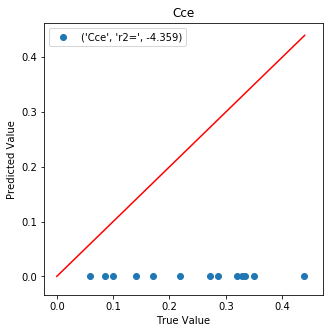

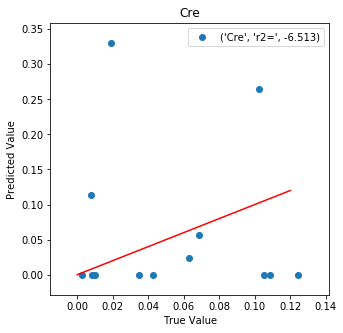

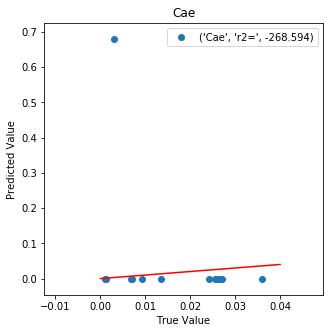

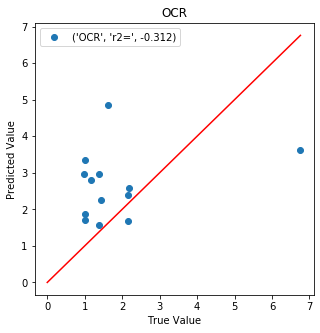

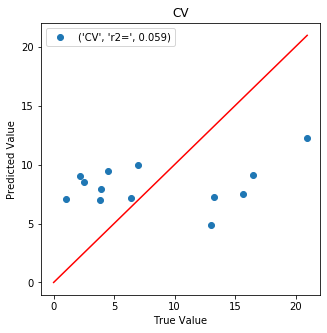

In [165]:
#targets=['Cce','Cre','Cae','OCR','CV']

for  i in range(5):
    R2=round(r2_score(y_valid_df[[i]],y_valid_predict[[i]]),3)
    plt.figure(figsize=(5,5))
    plt.scatter(np.array(y_valid_df[[i]]),y_valid_predict[[i]],label=(targets[i],'r2=',R2))
    
    xy_max=round(y_valid_df[[i]].max(),2)
    #print(xy_max)
    
    #plt.xlim(0,xy_max)
    plt.xlabel('True Value')
    
    #plt.ylim(0,xy_max)
    plt.ylabel('Predicted Value')
    
    #Plot the diagonal line
    plt.plot([0,xy_max],[0,xy_max], color='red')
    
    plt.legend()
    plt.title(targets[i])

#### 3.4 Check the Model on the Test Dataset

In [73]:
#mse_test = keras_reg.score(X_test, y_test)

In [74]:
#mse_test

In [75]:
# Evaluate the model on the test set
#y_hat=keras_reg.predict(X_test)

In [76]:
#results=pd.DataFrame(data=y_hat,columns=['Cce','Cre','Cae','OCR','CV'])

In [77]:
#results

In [78]:
#pd.DataFrame(y_test)